# END TO END TOY PROJECT WITH LOGISTIC REGRESSION TO UNDERSTAND ML PROJECT FLOW

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head(2)

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0

In [ ]:
# find missing values if any ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
# removed unnecessary column "Unnamed"
df = df.iloc[:,1:]
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

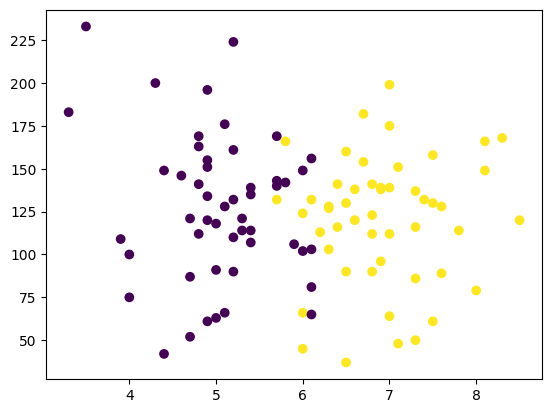

In [ ]:
# EDA
import matplotlib.pyplot as plt
# cgpa (x axis), iq(y axis), color = o/p = placement
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
# logistic regression (for classification)
# finds a line that seperates the 2 classes


In [ ]:
# seperate the independent variables (cgpa,iq)
# and the dependent variables (placement)
x = df.iloc[:,0:2]
x

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [ ]:
y = df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split


In [ ]:
# in this we pass independent variables(x),
# dependent variables(y), percentage of test set
train_test_split(x,y,test_size=0.1)

[    cgpa     iq
 40   4.9  134.0
 13   6.4  116.0
 42   7.6   89.0
 37   8.1  149.0
 74   6.7  154.0
 ..   ...    ...
 80   4.9  196.0
 30   7.6  128.0
 56   6.1   65.0
 3    7.4  132.0
 43   6.8  141.0
 
 [90 rows x 2 columns],
     cgpa     iq
 31   3.9  109.0
 48   6.6  138.0
 55   7.8  114.0
 98   6.3  103.0
 39   4.6  146.0
 58   8.0   79.0
 53   8.3  168.0
 28   5.2   90.0
 36   5.7  140.0
 6    5.7  143.0,
 40    0
 13    1
 42    1
 37    1
 74    1
      ..
 80    0
 30    1
 56    0
 3     1
 43    1
 Name: placement, Length: 90, dtype: int64,
 31    0
 48    1
 55    1
 98    1
 39    0
 58    1
 53    1
 28    0
 36    0
 6     0
 Name: placement, dtype: int64]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

cgpa     iq
73   4.9   61.0
92   5.2  110.0
37   8.1  149.0
60   6.9  139.0
30   7.6  128.0
..   ...    ...
54   6.4  141.0
56   6.1   65.0
46   5.3  114.0
40   4.9  134.0
85   5.8  166.0

[90 rows x 2 columns]

In [ ]:
x_test

cgpa     iq
9    5.1   66.0
50   3.5  233.0
88   4.4  149.0
61   7.3  137.0
36   5.7  140.0
35   6.8   90.0
66   6.9   96.0
55   7.8  114.0
80   4.9  196.0
49   5.4  135.0

In [ ]:
# scale the values
from sklearn.preprocessing import StandardScaler
# create an object of this class
scaler = StandardScaler()

In [ ]:
# now understand the data and transform
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.9998549 , -1.58686718],
       [-0.73070154, -0.31725828],
       [ 1.87111431,  0.69324677],
       [ 0.79450086,  0.43414291],
       [ 1.42252537,  0.14912866],
       [ 0.07675855,  0.25277021],
       [-1.17929048, -0.91319715],
       [-0.9998549 , -0.05815442],
       [-1.26900827,  0.61551561],
       [-1.807315  , -0.57636214],
       [ 0.07675855,  0.87461947],
       [-0.82041933,  1.39282718],
       [-1.89703278, -0.34316866],
       [ 1.42252537, -0.86137638],
       [-1.17929048, -0.03224404],
       [-0.73070154, -0.83546599],
       [ 0.70478307,  0.01957674],
       [ 0.97393643, -1.9237022 ],
       [ 0.4356297 ,  0.20094944],
       [-1.08957269,  1.05599217],
       [ 1.15337201, -0.16179596],
       [-1.08957269, -0.26543751],
       [ 0.70478307,  0.48596368],
       [-0.55126596, -0.21361674],
       [-0.10267702, -0.42089982],
       [-2.43533951,  1.57419988],
       [-0.19239481,  0.51187407],
       [-1.17929048, -1.82006065],
       [ 0.25619413,

In [ ]:
# since we already understood the pattern during test
# no need to fit again
x_test = scaler.transform(x_test)
x_test

array([[-0.82041933, -1.45731525],
       [-2.25590394,  2.86971917],
       [-1.44844384,  0.69324677],
       [ 1.15337201,  0.38232214],
       [-0.2821126 ,  0.46005329],
       [ 0.70478307, -0.83546599],
       [ 0.79450086, -0.68000368],
       [ 1.60196095, -0.21361674],
       [-0.9998549 ,  1.9110349 ],
       [-0.55126596,  0.33050137]])

In [ ]:
# training the model
# we will use LogisticRegression class
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# we will use the fit method of this class
# and pass the training data
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# evaluate the model using test set
# pass the input values
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
y_test

9     0
50    0
88    0
61    1
36    0
35    1
66    1
55    1
80    0
49    0
Name: placement, dtype: int64

In [ ]:
# accuracy calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# to get the decision boundary
# using mlextend plot decision boundary
from mlxtend.plotting import plot_decision_regions

In [ ]:
y_train.values

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1])

<Axes: >

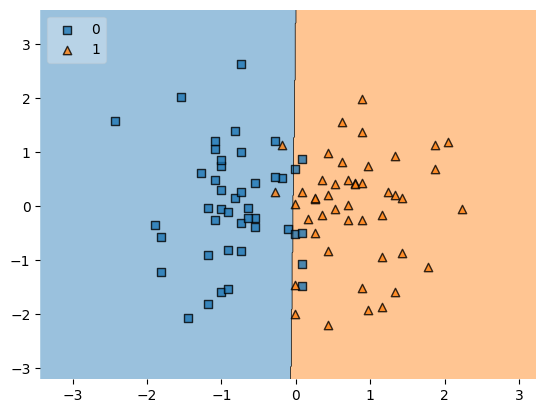

In [ ]:
# Plotting decision regions
# pass the numpy arrays
plot_decision_regions(x_train, y_train.values, clf=lr, legend=2)

In [ ]:
import pickle
# pickle convert object to a file
# in python everything is an object
pickle.dump(lr,open('model.pkl','wb'))

In [ ]:
# to deploy machine learning models
# use heroku, aws, gcp

# WORKING WITH CSV

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# opening a local csv file
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
import requests
from io import StringIO
# our program is a user which hits the url to request the content (client)
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36"}
req = requests.get(url,headers)
# from all the content that is fetched from the url,
# we need only the text
data = StringIO(req.text)
pd.read_csv(data)


Country         Region
0      Algeria         AFRICA
1       Angola         AFRICA
2        Benin         AFRICA
3     Botswana         AFRICA
4      Burkina         AFRICA
..         ...            ...
189   Paraguay  SOUTH AMERICA
190       Peru  SOUTH AMERICA
191   Suriname  SOUTH AMERICA
192    Uruguay  SOUTH AMERICA
193  Venezuela  SOUTH AMERICA

[194 rows x 2 columns]

In [ ]:
# whenever column names are not present pass a list of column names in param "names"
# tsv file handling
# param sep (by default is sep=','), creates columns based on this.
# for tabs -> use sep='\t'
df = pd.read_csv('movie_titles_metadata.tsv',sep='\t',names=['sno','name','release_year','rating','votes','genres'])
df.head()

sno                        name release_year  rating     votes  \
0  m0  10 things i hate about you         1999     6.9   62847.0   
1  m1  1492: conquest of paradise         1992     6.2   10421.0   
2  m2                  15 minutes         2001     6.1   25854.0   
3  m3       2001: a space odyssey         1968     8.4  163227.0   
4  m4                     48 hrs.         1982     6.9   22289.0   

                                           genres  
0                            ['comedy' 'romance']  
1     ['adventure' 'biography' 'drama' 'history']  
2           ['action' 'crime' 'drama' 'thriller']  
3                ['adventure' 'mystery' 'sci-fi']  
4  ['action' 'comedy' 'crime' 'drama' 'thriller']

In [ ]:
# whenever there is a column which wont be used in analysis and its like an unique id
# just make it an index, instead of the pandas default index
df = pd.read_csv('movie_titles_metadata.tsv',sep='\t',names=['sno','name','release_year','rating','votes','genres'],index_col='sno')
df.head()

name release_year  rating     votes  \
sno                                                              
m0   10 things i hate about you         1999     6.9   62847.0   
m1   1492: conquest of paradise         1992     6.2   10421.0   
m2                   15 minutes         2001     6.1   25854.0   
m3        2001: a space odyssey         1968     8.4  163227.0   
m4                      48 hrs.         1982     6.9   22289.0   

                                             genres  
sno                                                  
m0                             ['comedy' 'romance']  
m1      ['adventure' 'biography' 'drama' 'history']  
m2            ['action' 'crime' 'drama' 'thriller']  
m3                 ['adventure' 'mystery' 'sci-fi']  
m4   ['action' 'comedy' 'crime' 'drama' 'thriller']

In [ ]:
pd.read_csv('test_data.csv')


Unnamed: 0  Unnamed: 1   Unnamed: 2 Unnamed: 3              Unnamed: 4  \
0           0           0  enrollee_id       city  city_development_index   
1           1           1        29725    city_40                   0.776   
2           2           2        11561    city_21                   0.624   
3           3           3        33241   city_115                   0.789   
4           4           4          666   city_162                   0.767   

  Unnamed: 5               Unnamed: 6           Unnamed: 7       Unnamed: 8  \
0     gender      relevant_experience  enrolled_university  education_level   
1       Male   No relevent experience        no_enrollment         Graduate   
2        NaN   No relevent experience     Full time course         Graduate   
3        NaN   No relevent experience      Business Degree         Graduate   
4       Male  Has relevent experience        no_enrollment          Masters   

         Unnamed: 9 Unnamed: 10  
0  major_discipline  experience  
1              STEM          15  
2              STEM           5  
3                <1         NaN  
4              STEM         >20

In [ ]:
# header=1 indicates 1st row starts from 1.
test = pd.read_csv('test_data.csv',header=1)
test.head()

0  0.1  enrollee_id      city  city_development_index gender  \
0  1    1        29725   city_40                   0.776   Male   
1  2    2        11561   city_21                   0.624    NaN   
2  3    3        33241  city_115                   0.789    NaN   
3  4    4          666  city_162                   0.767   Male   

       relevant_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1   No relevent experience    Full time course        Graduate   
2   No relevent experience     Business Degree        Graduate   
3  Has relevent experience       no_enrollment         Masters   

  major_discipline experience  
0             STEM         15  
1             STEM          5  
2               <1        NaN  
3             STEM        >20

In [ ]:
# to fetch the req cols during importing the data itself
pd.read_csv('test_data.csv',header=1,usecols=['enrollee_id','gender','education_level'])


enrollee_id gender education_level
0        29725   Male        Graduate
1        11561    NaN        Graduate
2        33241    NaN        Graduate
3          666   Male         Masters

In [ ]:
pd.read_csv('test_data.csv')

Unnamed: 0  Unnamed: 1   Unnamed: 2 Unnamed: 3              Unnamed: 4  \
0           0           0  enrollee_id       city  city_development_index   
1           1           1        29725    city_40                   0.776   
2           2           2        11561    city_21                   0.624   
3           3           3        33241   city_115                   0.789   
4           4           4          666   city_162                   0.767   

  Unnamed: 5               Unnamed: 6           Unnamed: 7       Unnamed: 8  \
0     gender      relevant_experience  enrolled_university  education_level   
1       Male   No relevent experience        no_enrollment         Graduate   
2        NaN   No relevent experience     Full time course         Graduate   
3        NaN   No relevent experience      Business Degree         Graduate   
4       Male  Has relevent experience        no_enrollment          Masters   

         Unnamed: 9 Unnamed: 10  
0  major_discipline  experience  
1              STEM          15  
2              STEM           5  
3                <1         NaN  
4              STEM         >20

In [ ]:
# skip rows
pd.read_csv('/content/sample_data/california_housing_train.csv',skiprows=[2,3])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.57     33.64                14.0       1501.0           337.0   
2        -114.57     33.57                20.0       1454.0           326.0   
3        -114.58     33.63                29.0       1387.0           236.0   
4        -114.58     33.61                25.0       2907.0           680.0   
...          ...       ...                 ...          ...             ...   
16993    -124.26     40.58                52.0       2217.0           394.0   
16994    -124.27     40.69                36.0       2349.0           528.0   
16995    -124.30     41.84                17.0       2677.0           531.0   
16996    -124.30     41.80                19.0       2672.0           552.0   
16997    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1           515.0       226.0         3.1917             73400.0  
2           624.0       262.0         1.9250             65500.0  
3           671.0       239.0         3.3438             74000.0  
4          1841.0       633.0         2.6768             82400.0  
...           ...         ...            ...                 ...  
16993       907.0       369.0         2.3571            111400.0  
16994      1194.0       465.0         2.5179             79000.0  
16995      1244.0       456.0         3.0313            103600.0  
16996      1298.0       478.0         1.9797             85800.0  
16997       806.0       270.0         3.0147             94600.0  

[16998 rows x 9 columns]

In [ ]:
# only load 'n' number of rows from 'j' rows.
# only load '100' rows from '16998' rows
pd.read_csv('/content/sample_data/california_housing_train.csv',nrows=100)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -114.31     34.19                15.0       5612.0          1283.0   
1     -114.47     34.40                19.0       7650.0          1901.0   
2     -114.56     33.69                17.0        720.0           174.0   
3     -114.57     33.64                14.0       1501.0           337.0   
4     -114.57     33.57                20.0       1454.0           326.0   
..        ...       ...                 ...          ...             ...   
95    -115.58     32.81                 5.0        805.0           143.0   
96    -115.58     32.81                10.0       1088.0           203.0   
97    -115.58     32.79                14.0       1687.0           507.0   
98    -115.58     32.78                 5.0       2494.0           414.0   
99    -115.59     32.85                20.0       1608.0           274.0   

    population  households  median_income  median_house_value  
0       1015.0       472.0         1.4936             66900.0  
1       1129.0       463.0         1.8200             80100.0  
2        333.0       117.0         1.6509             85700.0  
3        515.0       226.0         3.1917             73400.0  
4        624.0       262.0         1.9250             65500.0  
..         ...         ...            ...                 ...  
95       458.0       143.0         4.4750             96300.0  
96       533.0       201.0         3.6597             87500.0  
97       762.0       451.0         1.6635             64400.0  
98      1416.0       421.0         5.7843            110100.0  
99       862.0       248.0         4.8750             90800.0  

[100 rows x 9 columns]

In [ ]:
# skip bad lines
# whenever  you get a parser error
# that is if you have lets say 5 columns, and 5 values in every row
# and some of the rows have 6,7,or 8 values
# we need to skip those
pd.read_csv('BX-Books.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 55, saw 2


In [ ]:
# on_bad_lines = 'error'
# Raises an exception (ParserError) when a bad line is encountered.
# on_bad_lines = 'skip'
#  Skips the bad lines and drops them from the resulting DataFrame without raising an error.
pd.read_csv('BX-Books.csv',sep=';',encoding='latin-1',on_bad_lines='skip')

ISBN                                         Book-Title  \
0      0195153448                                Classical Mythology   
1      0002005018                                       Clara Callan   
2      0060973129                               Decision in Normandy   
3      0374157065  Flu: The Story of the Great Influenza Pandemic...   
4      0393045218                             The Mummies of Urumchi   
...           ...                                                ...   
61048  0862412285        The Changeling (Canongate Classics, Vol 22)   
61049  0140028374                            The Highland clearances   
61050  0413163806                   Murder in the English Department   
61051  0786884320  Necessary Journeys : Letting Ourselves Learn F...   
61052  0930753054                                     Stupid Stories   

                Book-Author  Year-Of-Publication                   Publisher  \
0        Mark P. O. Morford                 2002     Oxford University Press   
1      Richard Bruce Wright                 2001       HarperFlamingo Canada   
2              Carlo D'Este                 1991             HarperPerennial   
3          Gina Bari Kolata                 1999        Farrar Straus Giroux   
4           E. J. W. Barber                 1999  W. W. Norton &amp; Company   
...                     ...                  ...                         ...   
61048         Robin Jenkins                 1989             Canongate Books   
61049          John Prebble                 1969                     Penguin   
61050              V. Miner                 1988                    Mandarin   
61051    Nancy L. Snyderman                 2001                    Hyperion   
61052           Bob Leonard                 1988        Spectacle Lane Press   

                                             Image-URL-S  \
0      http://images.amazon.com/images/P/0195153448.0...   
1      http://images.amazon.com/images/P/0002005018.0...   
2      http://images.amazon.com/images/P/0060973129.0...   
3      http://images.amazon.com/images/P/0374157065.0...   
4      http://images.amazon.com/images/P/0393045218.0...   
...                                                  ...   
61048  http://images.amazon.com/images/P/0862412285.0...   
61049  http://images.amazon.com/images/P/0140028374.0...   
61050  http://images.amazon.com/images/P/0413163806.0...   
61051  http://images.amazon.com/images/P/0786884320.0...   
61052  http://images.amazon.com/images/P/0930753054.0...   

                                             Image-URL-M  \
0      http://images.amazon.com/images/P/0195153448.0...   
1      http://images.amazon.com/images/P/0002005018.0...   
2      http://images.amazon.com/images/P/0060973129.0...   
3      http://images.amazon.com/images/P/0374157065.0...   
4      http://images.amazon.com/images/P/0393045218.0...   
...                                                  ...   
61048  http://images.amazon.com/images/P/0862412285.0...   
61049  http://images.amazon.com/images/P/0140028374.0...   
61050  http://images.amazon.com/images/P/0413163806.0...   
61051  http://images.amazon.com/images/P/0786884320.0...   
61052  http://images.amazon.com/images/P/0930753054.0...   

                                             Image-URL-L  
0      http://images.amazon.com/images/P/0195153448.0...  
1      http://images.amazon.com/images/P/0002005018.0...  
2      http://images.amazon.com/images/P/0060973129.0...  
3      http://images.amazon.com/images/P/0374157065.0...  
4      http://images.amazon.com/images/P/0393045218.0...  
...                                                  ...  
61048  http://images.amazon.com/images/P/0862412285.0...  
61049  http://images.amazon.com/images/P/0140028374.0...  
61050  http://images.amazon.com/images/P/0413163806.0...  
61051  http://images.amazon.com/images/P/0786884320.0...  
61052  http://images.amazon.com/images/P/0930753054.0...  

[61053 rows x 8 columns]

In [ ]:
pd.read_csv('/content/sample_data/california_housing_train.csv')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [ ]:
# we can save memory by converting float to int wherever possible
# for example total_rooms and total_bedrooms
pd.read_csv('/content/sample_data/california_housing_train.csv',dtype={'total_rooms':int,'total_bedrooms':int}).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.2 MB


In [ ]:
pd.read_csv('mdy.csv')

Month  Day  Year
12.0 23.0 2001.0    NaN  NaN   NaN
11.0 1.0  2002.0    NaN  NaN   NaN
6.0  22.0 2004.0    NaN  NaN   NaN
9.0  18.0 2005.0    NaN  NaN   NaN
10.0 10.0 2009.0    NaN  NaN   NaN
NaN  NaN  NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN

In [ ]:
pd.read_csv('mdy.csv')

Month  Day  Year
12.0 23.0 2001.0    NaN  NaN   NaN
11.0 1.0  2002.0    NaN  NaN   NaN
6.0  22.0 2004.0    NaN  NaN   NaN
9.0  18.0 2005.0    NaN  NaN   NaN
10.0 10.0 2009.0    NaN  NaN   NaN
NaN  NaN  NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN
          NaN       NaN  NaN   NaN

In [ ]:
pd.read_csv('input.csv')

Month  Day  Year
0     12   23  2001
1     11    1  2002
2      6   22  2004
3      9   18  2005
4     10   10  2009

In [ ]:
pd.read_csv('input.csv',parse_dates={'DATE': [0,1,2]}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 172.0 bytes


/tmp/ipython-input-3715332324.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  pd.read_csv('input.csv',parse_dates={'DATE': [0,1,2]}).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   5 non-null      int64 
 1   Day     5 non-null      object
 2   Year    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


/tmp/ipython-input-3588140164.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv('input.csv',parse_dates=['Day']).info()


In [ ]:
pd.read_csv('matches.csv').head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [ ]:
# convertors
def rename(name):
  if name == "Sunrisers Hyderabad":
    return "SH"
  else:
    return name

In [ ]:
pd.read_csv('matches.csv',converters={'team1':rename})

id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05                           SH   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25                           SH   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29                           SH   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
631  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
631  normal           0  Royal Challengers Bangalore            0   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
631               6         V Kohli   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   

                                                venue          umpire1  \
0           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1             Maharashtra Cricket Association Stadium   A Nand Kishore   
2              Saurashtra Cricket Association Stadium      Nitin Menon   
3                              Holkar Cricket Stadium     AK Chaudhary   
4                               M Chinnaswamy Stadium              NaN   
..                                                ...              ...   
631  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
632                             M Chinnaswamy Stadium     AK Chaudhary   
633                                  Feroz Shah Kotla        M Erasmus   
634                                  Feroz Shah Kotla        M Erasmus   
635                             M Chinnaswamy Stadium  HDPK Dharmasena   

     

In [ ]:
# handling large datasets using chunks
dataframes = pd.read_csv('matches.csv',chunksize=100)

In [ ]:
for chunk in dataframes:
  print(chunk.shape)

(100, 18)
(100, 18)
(100, 18)
(100, 18)
(100, 18)
(100, 18)
(36, 18)


# WORKING WITH JSON

In [ ]:
# https://api.exchangerate-api.com/v4/latest/INR

In [ ]:
pd.read_json('train.json')


id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]

In [ ]:
# loading json data from url
pd.read_json('https://api.exchangerate-api.com/v4/latest/INR')

provider  \
INR  https://www.exchangerate-api.com   
AED  https://www.exchangerate-api.com   
AFN  https://www.exchangerate-api.com   
ALL  https://www.exchangerate-api.com   
AMD  https://www.exchangerate-api.com   
..                                ...   
YER  https://www.exchangerate-api.com   
ZAR  https://www.exchangerate-api.com   
ZMW  https://www.exchangerate-api.com   
ZWG  https://www.exchangerate-api.com   
ZWL  https://www.exchangerate-api.com   

                          WARNING_UPGRADE_TO_V6  \
INR  https://www.exchangerate-api.com/docs/free   
AED  https://www.exchangerate-api.com/docs/free   
AFN  https://www.exchangerate-api.com/docs/free   
ALL  https://www.exchangerate-api.com/docs/free   
AMD  https://www.exchangerate-api.com/docs/free   
..                                          ...   
YER  https://www.exchangerate-api.com/docs/free   
ZAR  https://www.exchangerate-api.com/docs/free   
ZMW  https://www.exchangerate-api.com/docs/free   
ZWG  https://www.exchangerate-api.com/docs/free   
ZWL  https://www.exchangerate-api.com/docs/free   

                                      terms base       date  \
INR  https://www.exchangerate-api.com/terms  INR 2025-12-19   
AED  https://www.exchangerate-api.com/terms  INR 2025-12-19   
AFN  https://www.exchangerate-api.com/terms  INR 2025-12-19   
ALL  https://www.exchangerate-api.com/terms  INR 2025-12-19   
AMD  https://www.exchangerate-api.com/terms  INR 2025-12-19   
..                                      ...  ...        ...   
YER  https://www.exchangerate-api.com/terms  INR 2025-12-19   
ZAR  https://www.exchangerate-api.com/terms  INR 2025-12-19   
ZMW  https://www.exchangerate-api.com/terms  INR 2025-12-19   
ZWG  https://www.exchangerate-api.com/terms  INR 2025-12-19   
ZWL  https://www.exchangerate-api.com/terms  INR 2025-12-19   

     time_last_updated   rates  
INR         1766102401  1.0000  
AED         1766102401  0.0407  
AFN         1766102401  0.7330  
ALL         1766102401  0.9120  
AMD         1766102401  4.2300  
..                 ...     ...  
YER         1766102401  2.6400  
ZAR         1766102401  0.1860  
ZMW         1766102401  0.2540  
ZWG         1766102401  0.2890  
ZWL         1766102401  0.2890  

[166 rows x 7 columns]

# WORKING WITH SQL

In [ ]:
!pip install mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp312-cp312-linux_x86_64.whl size=247950 sha256=f38cfbaa3211a0b02714ab7012610c9a4d643ab79c0bd93ba519ae1b336df83c
  Stored in directory: /root/.cache/pip/wheels/03/17/fa/d7604c72dd3dd6d3eb3d249abf36cc532c9a9b4354b8f1bc4f
Successfully built mysql.connector


In [ ]:
import mysql.connector

In [ ]:
# python to database (mysql) connection
# there will be multiple databases so choose the right one
# where your database is running mention that in host
# if its running on a remote server, mention
# its ip address
# in this case it is running on my local machine , so localhost
# for xampp user=root by default
# run the apache web server and mysql database server
# go to localhost/phpmyadmin
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='world'
)

InterfaceError: 2003: Can't connect to MySQL server on '127.0.0.1:3306' (111 Connection refused)

In [ ]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.6 MB/s eta 0:00:00


In [ ]:
import ngrok

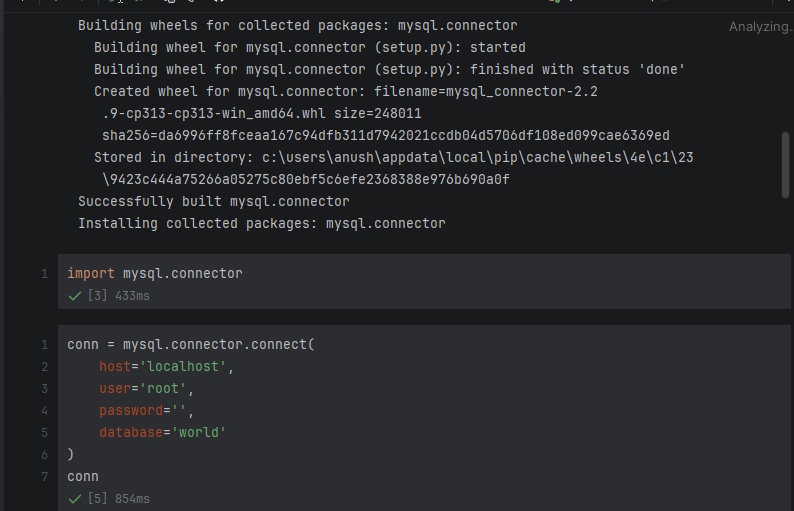

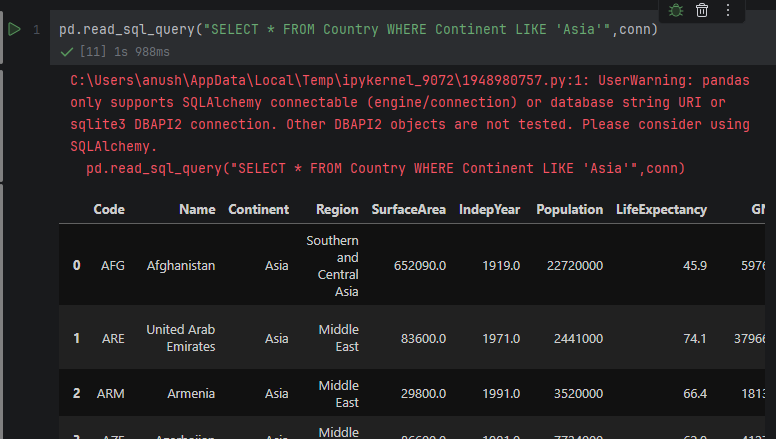

# Understanding your data with 7 questions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

### Q1) How big is the data

In [ ]:
df.shape

(891, 12)

### Q2) How does the data look like ?

In [ ]:
# to prevent bias, we will pick random rows from the dataset
df.sample(5)

PassengerId  Survived  Pclass  \
674          675         0       2   
199          200         0       2   
863          864         0       3   
423          424         0       3   
692          693         1       3   

                                                  Name     Sex   Age  SibSp  \
674                         Watson, Mr. Ennis Hastings    male   NaN      0   
199             Yrois, Miss. Henriette ("Mrs Harbeck")  female  24.0      0   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
423  Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...  female  28.0      1   
692                                       Lam, Mr. Ali    male   NaN      0   

     Parch    Ticket     Fare Cabin Embarked  
674      0    239856   0.0000   NaN        S  
199      0    248747  13.0000   NaN        S  
863      2  CA. 2343  69.5500   NaN        S  
423      1    347080  14.4000   NaN        S  
692      0      1601  56.4958   NaN        S

### Q3) What is the datatype of the columns ?

In [ ]:
# to get info on memory usage, if there is float, try to convert to int if possible to reduce memory,
# also tells about object(string), numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q4) Are there any missing values ?

In [ ]:
# first way is to use df.info() to find the missing values, see the count of non-null values
# to find the no. of missing values in every column we use
df.isnull().sum() # returns a series

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Q5) How does the data look like mathematically ?

In [ ]:
# applied only on numerical columns
# gives a high level mathematical summary
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
# tells 50% people are less than or equal to 28 years of age (50 percentile)
# tells 75% people are less than or equal to 38 years of age (75 percentile)

### Q6) Are there duplicate values ?

In [ ]:
# returns the number of duplicate rows
# drop duplicates function is used to drop the duplicate rows
df.duplicated().sum()

np.int64(0)

### Q7) How is the correlation between columns ?

# New Section

In [ ]:
# applied only on numerical columns
# calculated using pearson correlation coefficient
# range from -1 to 1
# -ve value -> inversely correlated (x inc, y dec)
# +ve value -> directly correlated (x inc , y inc)
df.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [ ]:
# here "Survived" is the output column
# lets see how every other col is affecting the output col
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [ ]:
# we can see that Pclass has a negative correlation
# means as Pclass keeps increasing from 1 -> 2-> 3 survival rate decreases
# and as Fare increases, survival rate increases
# elites in the top class -> survived
# general people in the bottom class -> did not survive

# EDA (UNIVARIATE ANALYSIS)

In [ ]:
# single variable analysis
# independent analysis of single column

## Ask which columns helps us in telling about survival (output column)

### Q) Ask if the column is categorical or numerical ?

Ask this question to every column

In [ ]:
df.sample(5)

PassengerId  Survived  Pclass                             Name     Sex  \
22            23         1       3      McGowan, Miss. Anna "Annie"  female   
102          103         0       1        White, Mr. Richard Frasar    male   
346          347         1       2        Smith, Miss. Marion Elsie  female   
68            69         1       3  Andersson, Miss. Erna Alexandra  female   
400          401         1       3               Niskanen, Mr. Juha    male   

      Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
22   15.0      0      0             330923   8.0292   NaN        Q  
102  21.0      0      1              35281  77.2875   D26        S  
346  40.0      0      0              31418  13.0000   NaN        S  
68   17.0      4      2            3101281   7.9250   NaN        S  
400  39.0      0      0  STON/O 2. 3101289   7.9250   NaN        S

output column is "Survived"

Pclass : 1-Elite, 3-normal (general)

Embarked : S,C,Q are the 3 stations

## Dealing with Categorical columns

Categorical columns -> are the columns which have categories

Survived -> categories are 0,1

Pclass -> categories are 1,2,3

Name -> has many categories -> need nlp tools -> so not using this

Sex -> categories are male, female

Sibsp (siblingspouse) -> categories -> 0,1 (travelling with either a sibling or a spouse)

Parch (Parentchild) -> categories -> 0,1

Ticket -> again many categories

Cabin -> has categories

Embarked -> 3 stations : S,C,Q




In [ ]:
import seaborn as sns


### Countplot

gives the frequency count of every category of a categorical column

<Axes: xlabel='Survived', ylabel='count'>

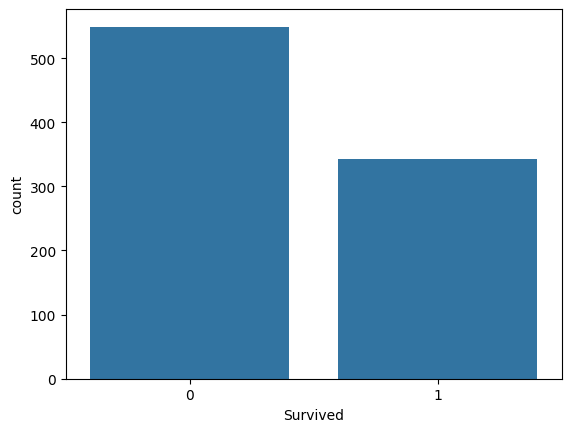

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
# using valuecounts
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

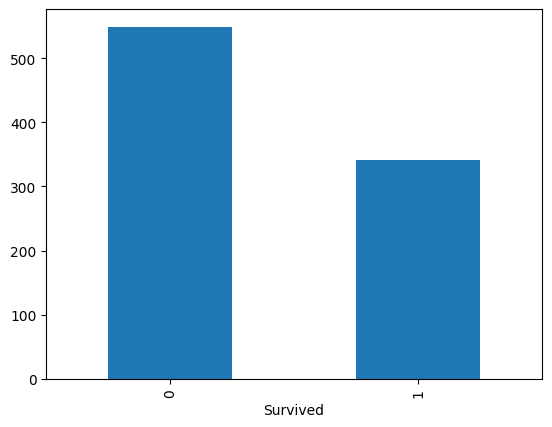

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

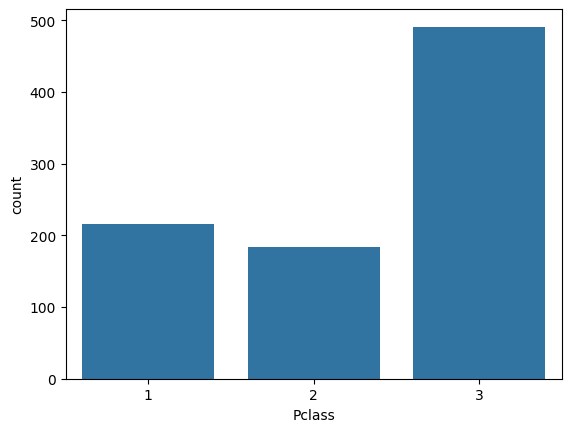

In [ ]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Sex', ylabel='count'>

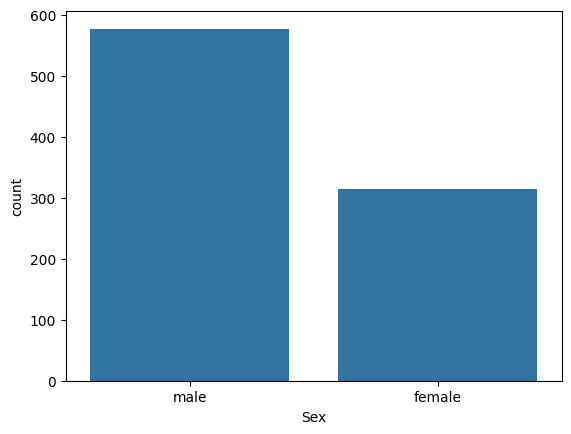

In [ ]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Parch', ylabel='count'>

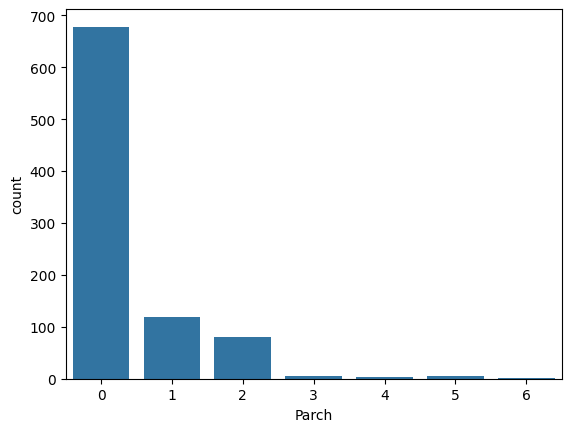

In [ ]:
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

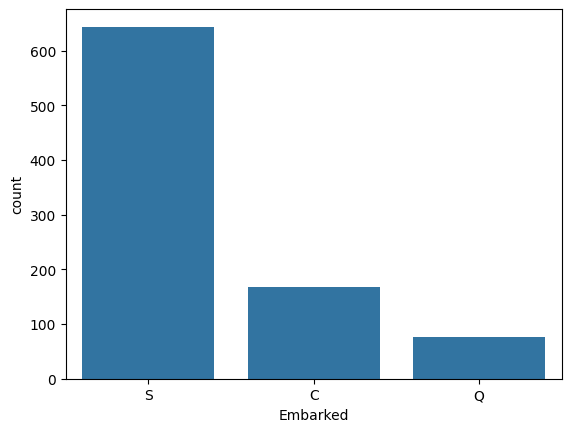

In [ ]:
sns.countplot(x='Embarked',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

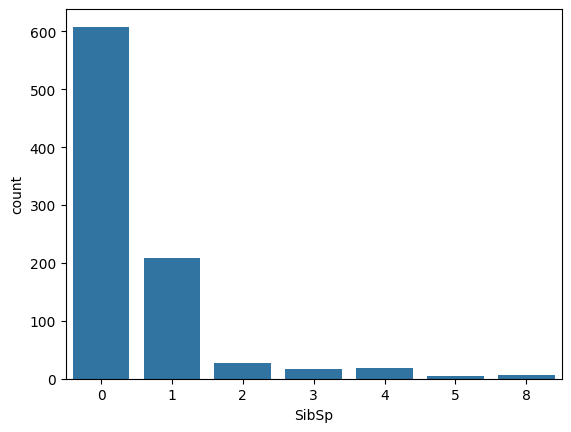

In [ ]:
sns.countplot(x='SibSp',data=df)

### PIECHART

in terms of percentage

<Axes: ylabel='count'>

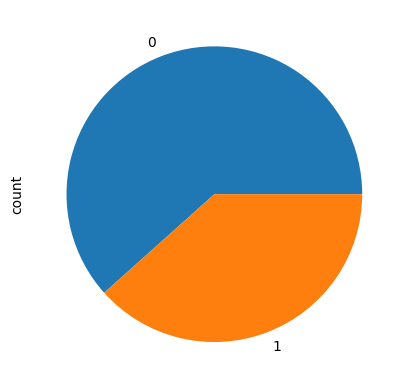

In [ ]:
df['Survived'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

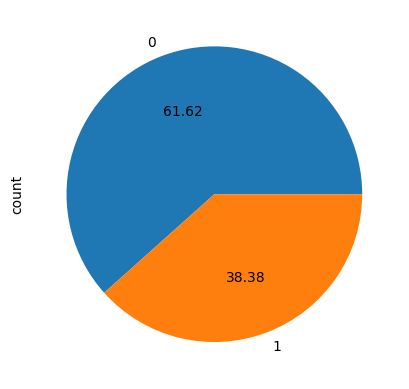

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f') # round of to 2 decimal places

<Axes: ylabel='count'>

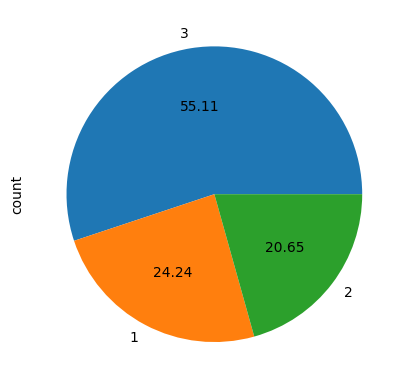

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

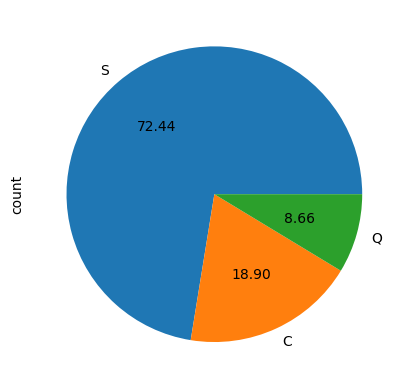

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

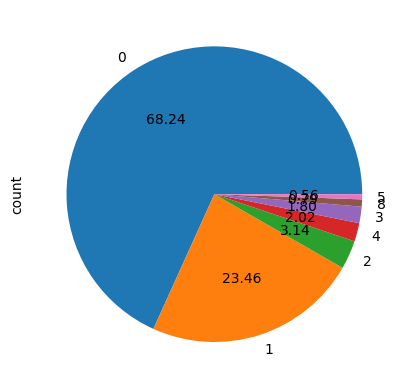

In [ ]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%.2f')

## Dealing with Numerical Data

columns : Age, Fare

range -> create bins for ex : Age : 0->80 (8 bins)

tells the number of passengers in each range, for continuous data

In [ ]:
df['Age'].min()

0.42

In [ ]:
df['Age'].max()

80.0

### HISTOGRAM

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

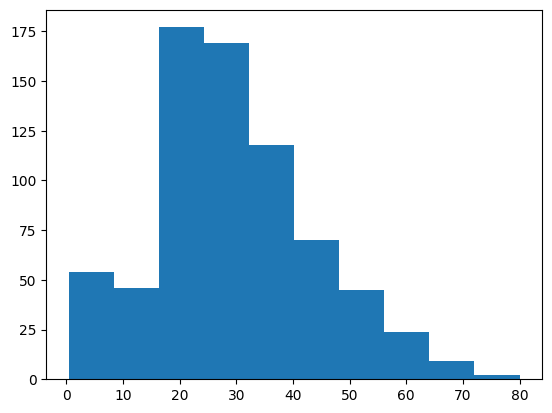

In [ ]:
plt.hist(df['Age'])

In [ ]:
# we can see that max people are aged between 18-35 yrs

In [ ]:
df.shape

(891, 12)

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

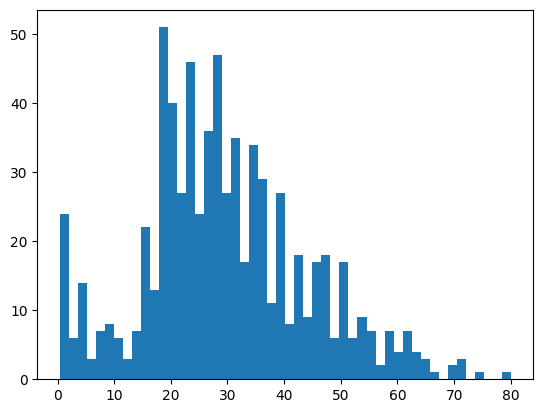

In [ ]:
# for small ranges
plt.hist(df['Age'],bins=50)

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

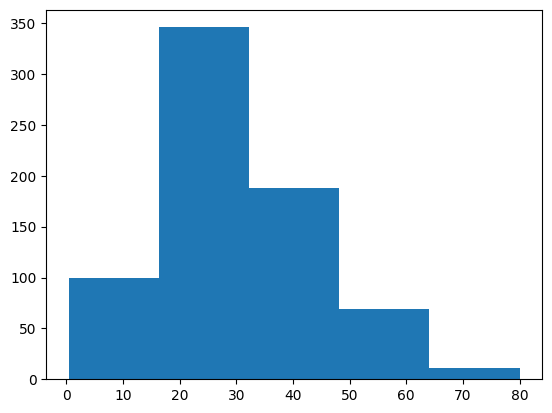

In [ ]:
# for larger ranges
plt.hist(df['Age'],bins=5)

In [ ]:
df['Fare'].min()

0.0

In [ ]:
df['Fare'].max()

512.3292

(array([773.,  80.,  18.,  11.,   6.,   0.,   0.,   3.]),
 array([  0.     ,  64.04115, 128.0823 , 192.12345, 256.1646 , 320.20575,
        384.2469 , 448.28805, 512.3292 ]),
 <BarContainer object of 8 artists>)

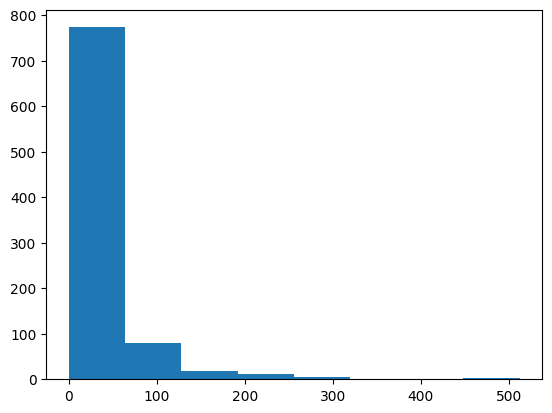

In [ ]:
plt.hist(df['Fare'],bins=8)

### DISTPLOT

kernel density estimation, probability density function

tells the probability

for ex : what is the probability that a person's age is 40 = 0.015 * 100% = 1.5%

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

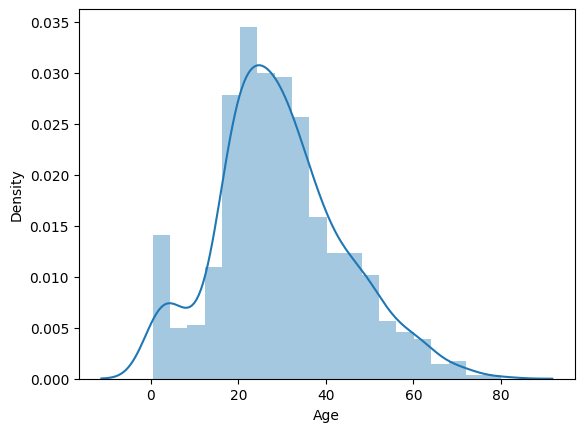

In [ ]:
sns.distplot(df['Age'])

/tmp/ipython-input-3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

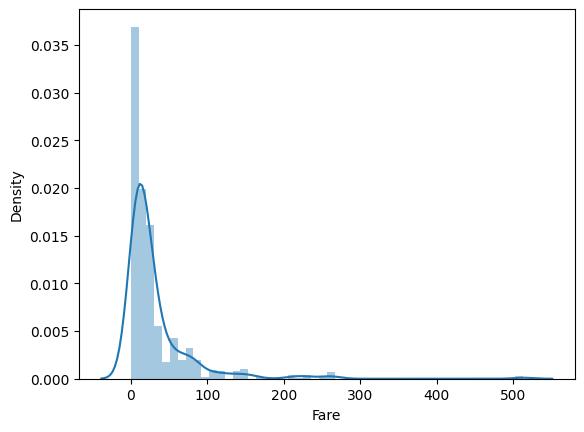

In [ ]:
sns.distplot(df['Fare'])

**SKEWNESS**:

0-> perfectly skewed - symmetrical

+ve no. -> +vely skewed towards right side

-ve no. -> -vely skewed toward left side

In [ ]:
df['Age'].skew()

np.float64(0.38910778230082704)

In [ ]:
df['Fare'].skew()

np.float64(4.787316519674893)

In [ ]:
0.015*100


1.5

randomly choose a pasenger from the given passengers, and ask what is the probability that his age is 40 yrs ?

/tmp/ipython-input-3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

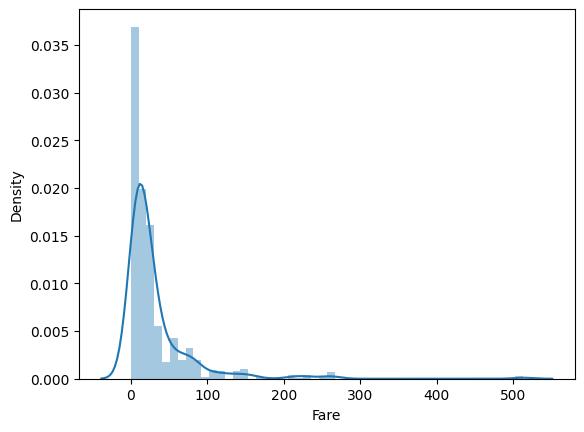

In [ ]:
sns.distplot(df['Fare'])

In [ ]:
0.020*100

2.0

### BOXPLOT

for noisy data, and outliers

5 number summary

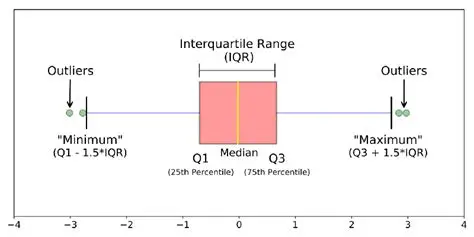

IQR = (Q3-Q1)
MEDIAN = after sorting the numerical data, the middle value is the median -> 50th percentile

ex : -3,-2,-1,**0**,1,2,3

25th percentile -> 25% values are less than Q1

50th percentile -> 50% values are less than Q2

75th percentile -> 75% values are less than Q3

the max and min in the box plot is calculated using the quartile range and is different from max and min of the actual column

<Axes: xlabel='Fare'>

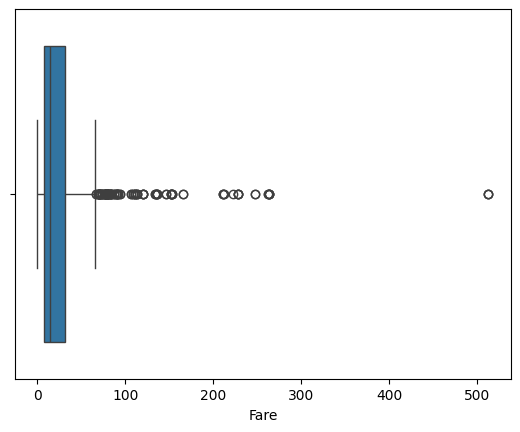

In [ ]:
sns.boxplot(x=df['Fare'])

75% of the passengers have paid the fare price less than 40 dollars

and there are so many outliers -> where passengers have paid

fair prices >100 and one passenger paid 500$ (elite class haha)

In [ ]:
df['Fare'].mean()

np.float64(32.204207968574636)

In [ ]:
df['Fare'].min()

0.0

In [ ]:
df['Fare'].max()

512.3292

<Axes: xlabel='Age'>

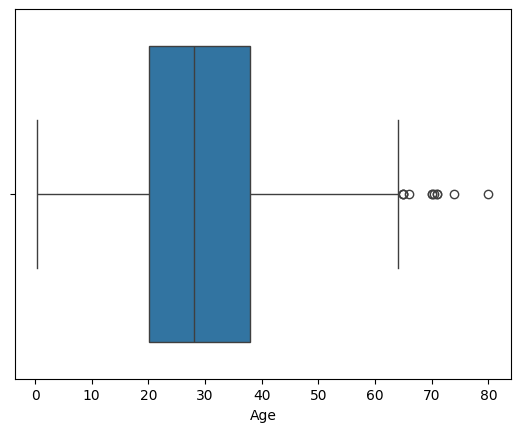

In [ ]:
sns.boxplot(x=df['Age'])

more than 75% of passengers are less than 38 yrs of age

outliers -> passengers with age >65 even reaching till 82

# EDA USING BIVARIATE AND MULTIVARIATE ANALYSIS

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
titanic = pd.read_csv('train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
flights = sns.load_dataset('flights') # US AIRLINES
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Bivariate analysis - analysing two columns at the same time
## Ask what is the nature of both these columns ? numerical or categorical?

###SCATTERPLOT (NUMERICAL - NUMERICAL)

#### bivariate

<Axes: xlabel='total_bill', ylabel='tip'>

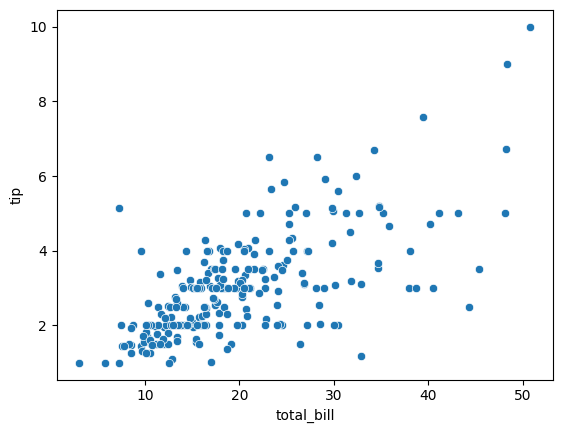

In [ ]:
sns.scatterplot(data=tips,x='total_bill',y='tip')

sort of linear relationship

we can see that as the total_bill increases, the tip also increases.
a customer who pays more, generally gives a huge tip

every point represents a customer

#### multivariate

added sex (3 columns analysis)

param = hue

<Axes: xlabel='total_bill', ylabel='tip'>

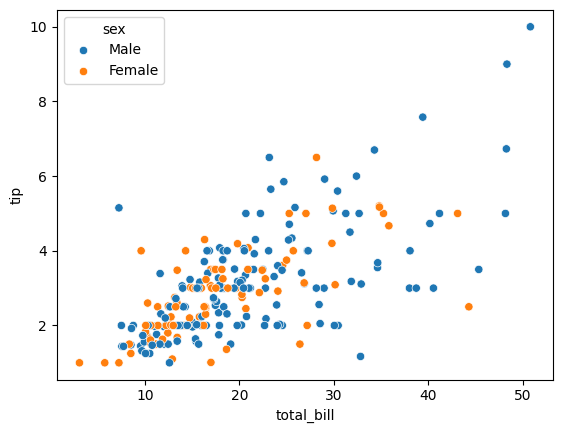

In [ ]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex')

added smoker (4 columns analysis)

param = style

<Axes: xlabel='total_bill', ylabel='tip'>

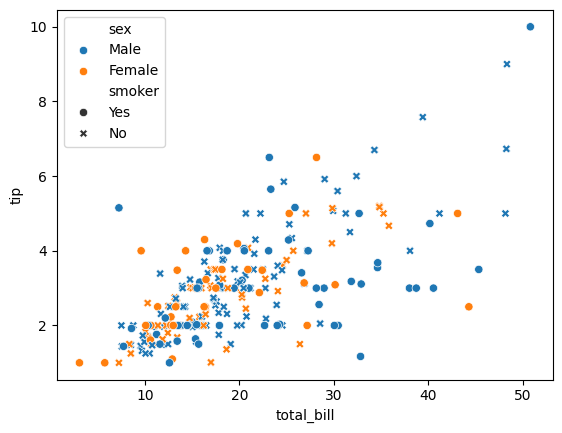

In [ ]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='smoker')

param = size

added size (5 columns analysis)

<Axes: xlabel='total_bill', ylabel='tip'>

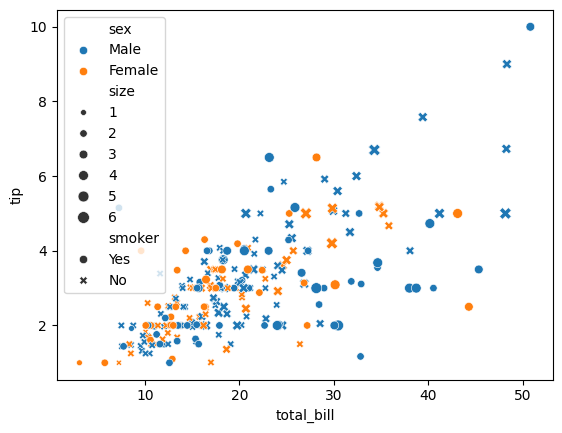

In [ ]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='smoker',size='size')

here the bigger the size of the circle and the cross indicates the larger number of people a customer brought along with them.

### BARPLOT (NUMERICAL - CATEGORICAL)
when you have one numerical column and one categorical column we use this

we keep categories in the x-axis, numerical values in the y-axis

#### bivariate

finding the average age of each class

<Axes: xlabel='Pclass', ylabel='Age'>

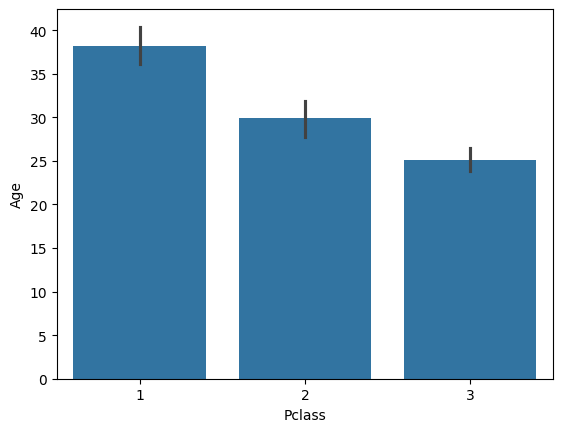

In [ ]:
sns.barplot(data=titanic,x='Pclass',y='Age')

black lines is the confidence interval - check statistics

avg age of :

Pclass 1 : around 38 yrs

Pclass 2 : around 28-30 yrs

Pclass 3 : around 23 yrs (younger poplulation is travelling in this)

<Axes: xlabel='Pclass', ylabel='Fare'>

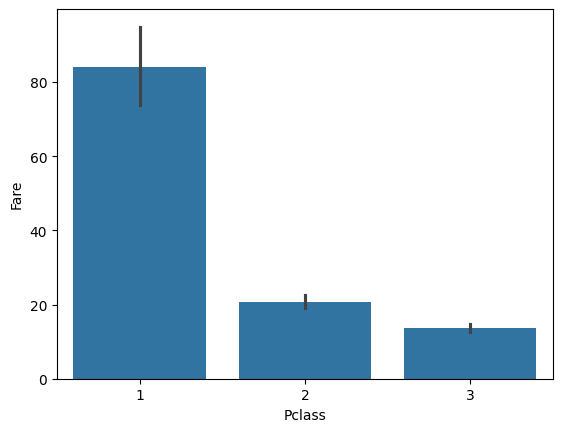

In [ ]:
sns.barplot(data=titanic,x='Pclass',y='Fare')

avg fare of Pclass 1 is higher than the other classes

#### multivariate

<Axes: xlabel='Pclass', ylabel='Age'>

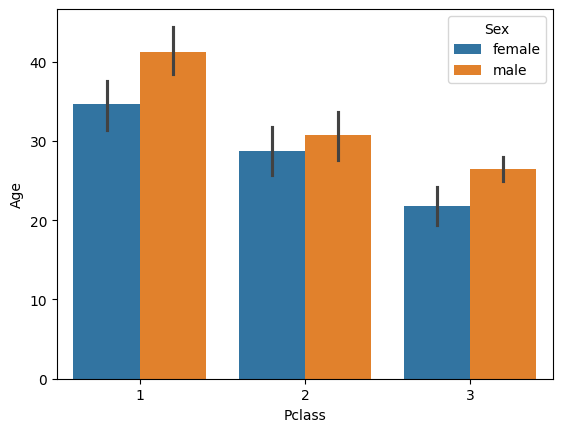

In [ ]:
sns.barplot(data=titanic,x='Pclass',y='Age',hue='Sex')

we can see that avg age of male is higher than their female counterparts in each class

<Axes: xlabel='Pclass', ylabel='Fare'>

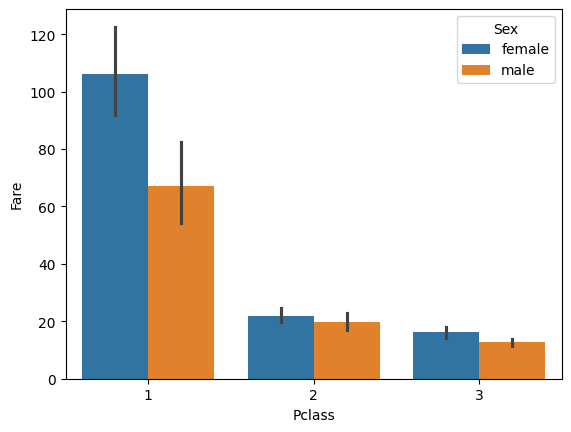

In [ ]:
sns.barplot(data=titanic,x='Pclass',y='Fare',hue='Sex')

avg fare paid by females is higher than their male counterparts in each class

### BOXPLOT (NUMERICAL - CATEGORICAL)

single numerical quantity analysis across categories to detect outliers

#### bivariate

<Axes: xlabel='Sex', ylabel='Age'>

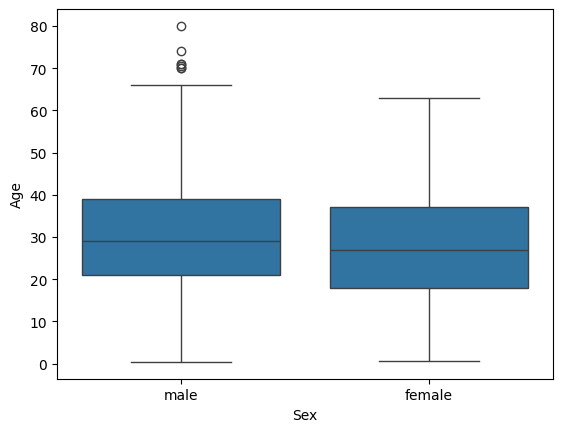

In [ ]:
sns.boxplot(data=titanic,x='Sex',y='Age')

<Axes: xlabel='Sex', ylabel='Fare'>

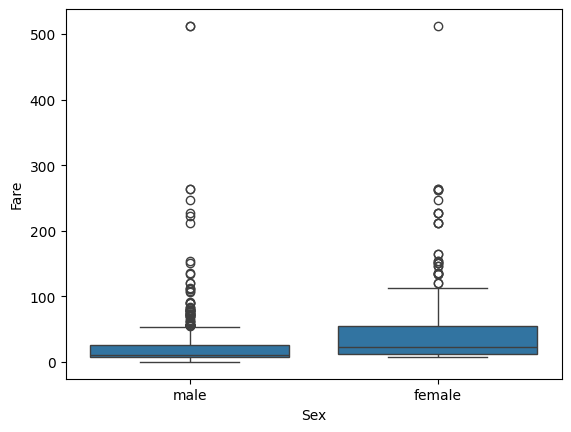

In [ ]:
sns.boxplot(data=titanic,x='Sex',y='Fare')

<Axes: xlabel='Pclass', ylabel='Age'>

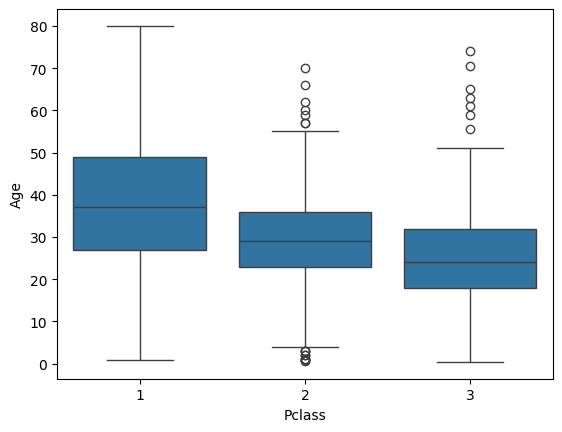

In [ ]:
sns.boxplot(data=titanic,x='Pclass',y='Age')

we can see that younger population is travelling in Pclass 3 and older population is travelling in Pclass 1

#### multivariate

In [ ]:
titanic.groupby('Sex')['Fare'].describe()

count       mean        std   min        25%   50%    75%       max
Sex                                                                        
female  314.0  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292
male    577.0  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

there are outliers in male in terms of age as seen above

This means that 75% of the males in the dataset are aged 39 or younger.

In [ ]:
titanic.groupby(['Sex','Survived'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Sex    Survived                                                             
female 0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
       1         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
male   0         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
       1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

<Axes: xlabel='Sex', ylabel='Age'>

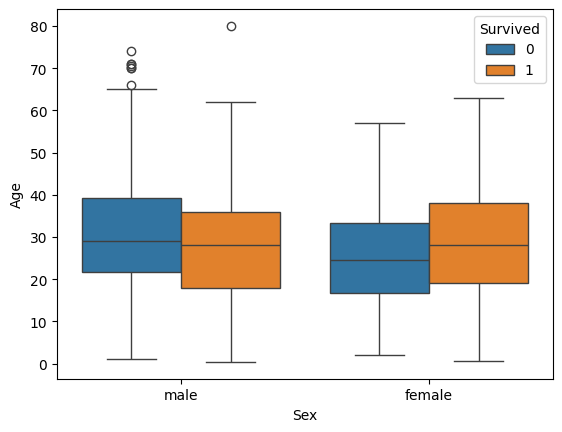

In [ ]:
sns.boxplot(data=titanic,x='Sex',y='Age',hue='Survived')

75% of survived females were 38 years old or younge.

Only 25% of survived females were older than 38.

in males -> younger population has more survival

in females -> older population has more survival

In [ ]:
titanic.groupby(['Sex','Survived'])['Fare'].describe()

count       mean        std    min      25%       50%  \
Sex    Survived                                                          
female 0          81.0  23.024385  24.821287  6.750   8.8500  15.24580   
       1         233.0  51.938573  64.102256  7.225  13.0000  26.00000   
male   0         468.0  21.960993  32.409799  0.000   7.7958   9.41665   
       1         109.0  40.821484  71.355967  0.000   9.5000  26.28750   

                     75%       max  
Sex    Survived                     
female 0         27.9000  151.5500  
       1         76.2917  512.3292  
male   0         26.0000  263.0000  
       1         39.0000  512.3292

<Axes: xlabel='Sex', ylabel='Fare'>

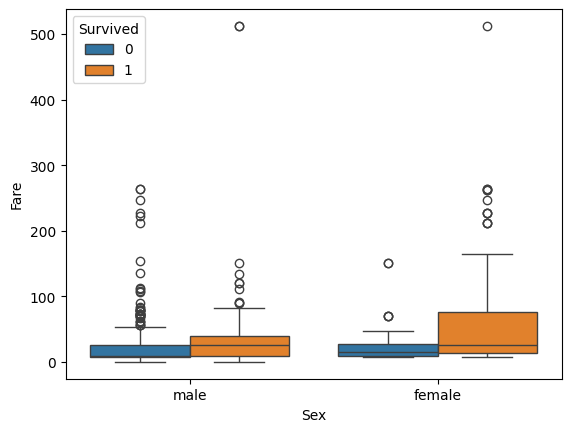

In [ ]:
sns.boxplot(data=titanic,x='Sex',y='Fare',hue='Survived')

<Axes: xlabel='Sex', ylabel='Fare'>

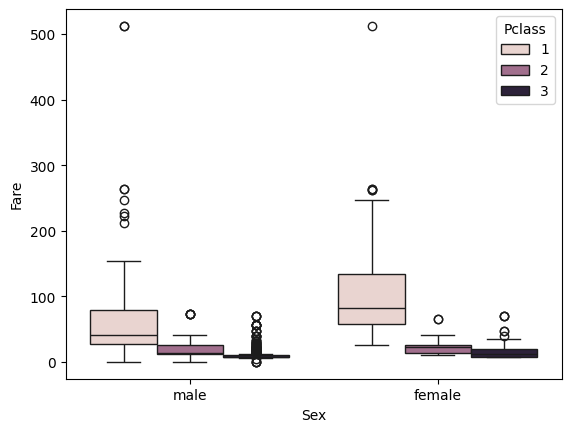

In [ ]:
sns.boxplot(data=titanic,x='Sex',y='Fare',hue='Pclass')

### DISTPLOT (NUMERICAL - CATEGORICAL)

#### bivariate

/tmp/ipython-input-3239753010.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,hist=False)
/tmp/ipython-input-3239753010.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived,hist=False)


<Axes: xlabel='Age', ylabel='Density'>

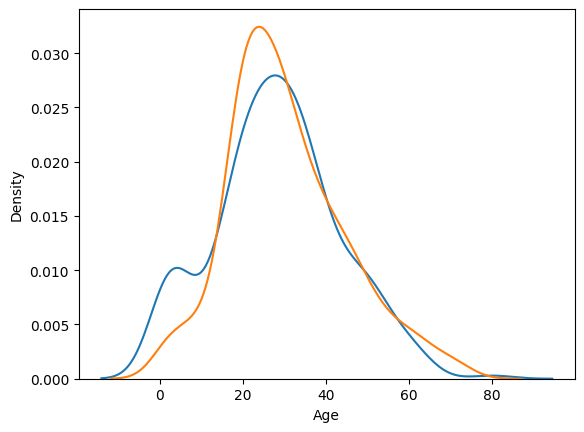

In [ ]:
# pdf
survived_mask = titanic['Survived'] == 1
not_survived_mask = titanic['Survived'] == 0
not_survived = titanic[not_survived_mask]['Age']
survived = titanic[survived_mask]['Age']
sns.distplot(survived,hist=False)
sns.distplot(not_survived,hist=False)

blue -> survival

orange -> not survived

children have a probability of death lesser than probability of survival (0-5 yrs of age)

from 15-30 yrs of age -> probability of death is higher than probability of survival

from 60-80 yrs of age -> prob of death is higher than prob of survival

in titanic, children were rescued, old age people died.

/tmp/ipython-input-1442421198.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,hist=False)
/tmp/ipython-input-1442421198.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived,hist=False)


<Axes: xlabel='Fare', ylabel='Density'>

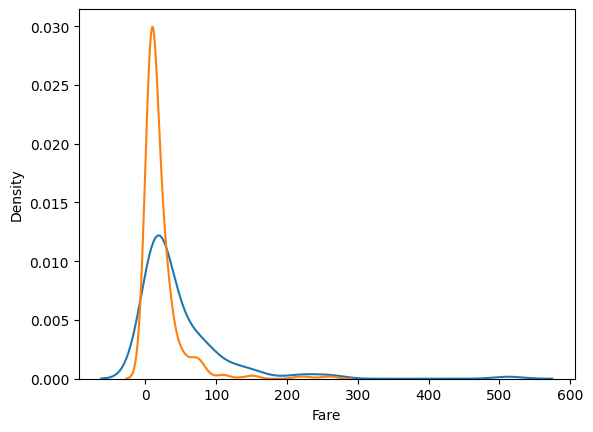

In [ ]:
# pdf
survived_mask = titanic['Survived'] == 1
not_survived_mask = titanic['Survived'] == 0
not_survived = titanic[not_survived_mask]['Fare']
survived = titanic[survived_mask]['Fare']
sns.distplot(survived,hist=False)
sns.distplot(not_survived,hist=False)

people who have spent less money a.k.a Pclass 3(general) have prob of death > prob of survival.

/tmp/ipython-input-1938866291.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pclass1,hist=False)
/tmp/ipython-input-1938866291.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pclass2,hist=False)
/tmp/ipython-input-1938866291.py:12: UserWarning: 

`distplot` is a depr

<Axes: xlabel='Age', ylabel='Density'>

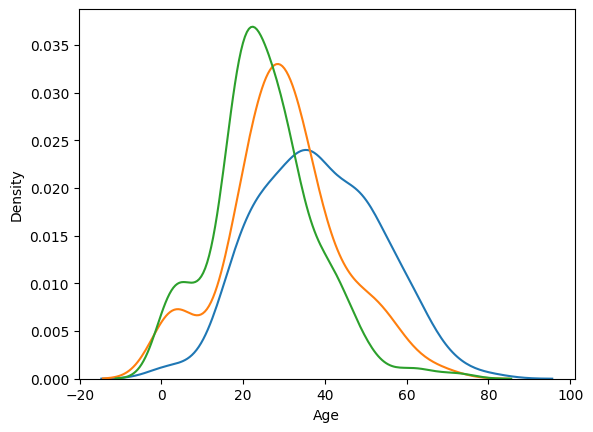

In [ ]:
# pdf
mask1 = titanic['Pclass'] == 1
mask2 = titanic['Pclass'] == 2
mask3 = titanic['Pclass'] == 3

pclass1 = titanic[mask1]['Age']
pclass2 = titanic[mask2]['Age']
pclass3 = titanic[mask3]['Age']

sns.distplot(pclass1,hist=False)
sns.distplot(pclass2,hist=False)
sns.distplot(pclass3,hist=False)

In [ ]:
pclass1.describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

### HEATMAP (CATEGORICAL - CATEGORICAL)

#### bivariate

In [ ]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

<Axes: xlabel='Survived', ylabel='Pclass'>

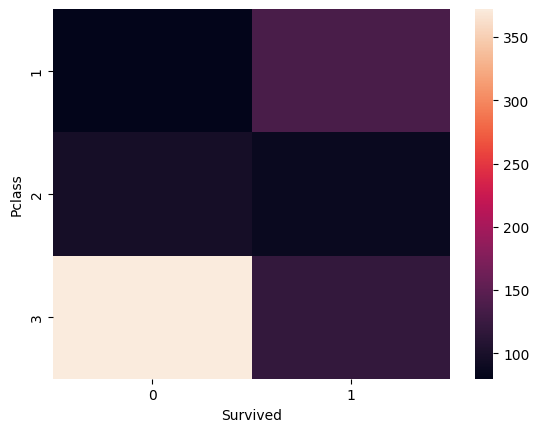

In [ ]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

in heatmap , the lighter shade indicates higher number

very light is in P class 3, not survived

next lighter is in P class 1 , survived

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='Sex'>

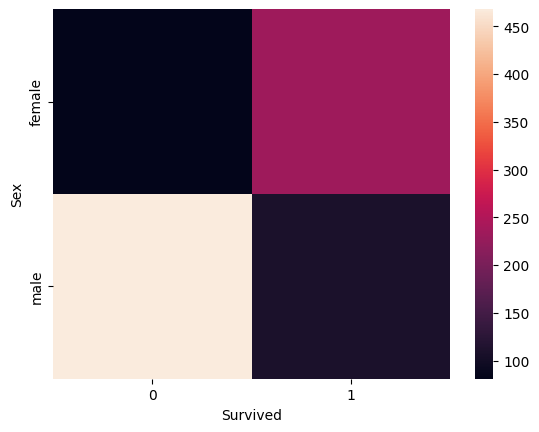

In [ ]:
sns.heatmap(pd.crosstab(titanic['Sex'],titanic['Survived']))

we can see that large number of males have not survived

and decent no. of females have survived

In [ ]:
pd.crosstab(titanic['Sex'],titanic['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

In [ ]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [ ]:
(136+80)/2

108.0

In [ ]:
df = titanic.groupby('Pclass').value_counts()
df.head()

Pclass  PassengerId  Survived  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin  Embarked
1       2            1         Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85    C           1
        4            1         Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123   S           1
        7            0         McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46    S           1
        12           1         Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103   S           1
        24           1         Sloper, Mr. William Thompson                         male    28.0  0      0      113788    35.5000  A6     S           1
Name: count, dtype: int64

In [ ]:
titanic.groupby('Pclass').count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               216       216   216  216  186    216    216     216   216   
2               184       184   184  184  173    184    184     184   184   
3               491       491   491  491  355    491    491     491   491   

        Cabin  Embarked  
Pclass                   
1         176       214  
2          16       184  
3          12       491

##### in terms of percentages

In [ ]:
titanic.groupby('Pclass').mean('Survived')

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

In [ ]:
titanic.groupby('Pclass').mean('Survived')['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

we can see that 62% people survived in Pclass1

47% people survived in Pclass2

24% people survived in Pclass3

<Axes: xlabel='Pclass'>

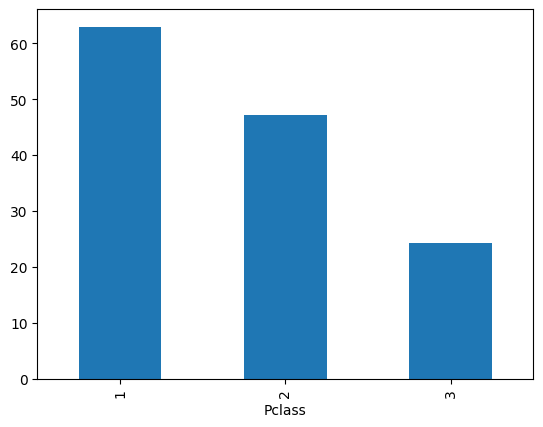

In [ ]:
(titanic.groupby('Pclass').mean('Survived')['Survived']*100).plot(kind='bar') # can be plotted because it is a series

In [ ]:
# 5 points : [1,1,1,1,0]
(1+1+1+1+0)/5

0.8

In [ ]:
# 4 points : [1,1,0,0]
(1+1+0+0)/4

0.5

similarly survival is calculated based on the number of ones.

In [ ]:
(titanic.groupby('Sex').mean('Survived')['Survived']*100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

we can see that 74% of the females survived

<Axes: xlabel='Sex'>

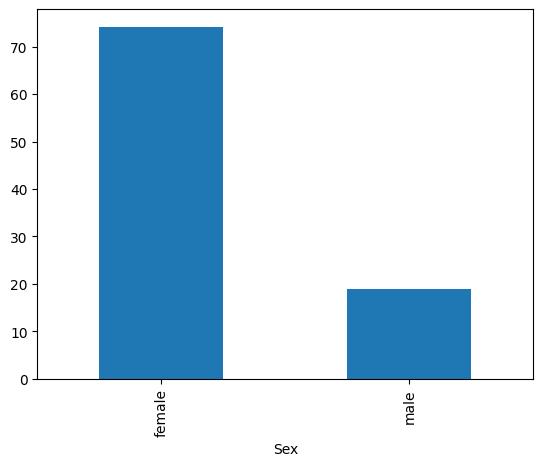

In [ ]:
(titanic.groupby('Sex').mean('Survived')['Survived']*100).plot(kind='bar') # can be plotted because it is a series

In [ ]:
(titanic.groupby('Embarked').mean('Survived')['Survived']*100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

we can see that people who got in at station 'C' have survived more than people who got in at other stations

maybe because more females got in at station 'C'

In [ ]:
flights.pivot_table(values='passengers',index='month',columns='year')

/tmp/ipython-input-2056291100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year')


year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
Dec    118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

year    1959   1960  
month                
Jan    360.0  417.0  
Feb    342.0  391.0  
Mar    406.0  419.0  
Apr    396.0  461.0  
May    420.0  472.0  
Jun    472.0  535.0  
Jul    548.0  622.0  
Aug    559.0  606.0  
Sep    463.0  508.0  
Oct    407.0  461.0  
Nov    362.0  390.0  
Dec    405.0  432.0

/tmp/ipython-input-2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

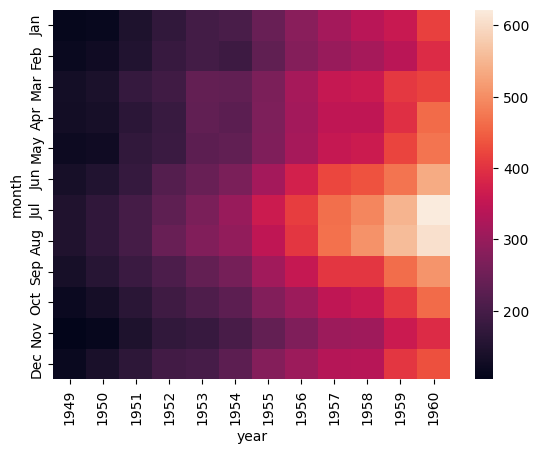

In [ ]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

lighter shade indicates higher numbers

and we can see that as the year increases from 1949-> 1960, US Airlines have started getting more passengers

and also during the months of June,July,august we can see a lighter shade, indicating more people took the airlines in those months

### Clustermap (categorical - categorical)

/tmp/ipython-input-2300184754.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


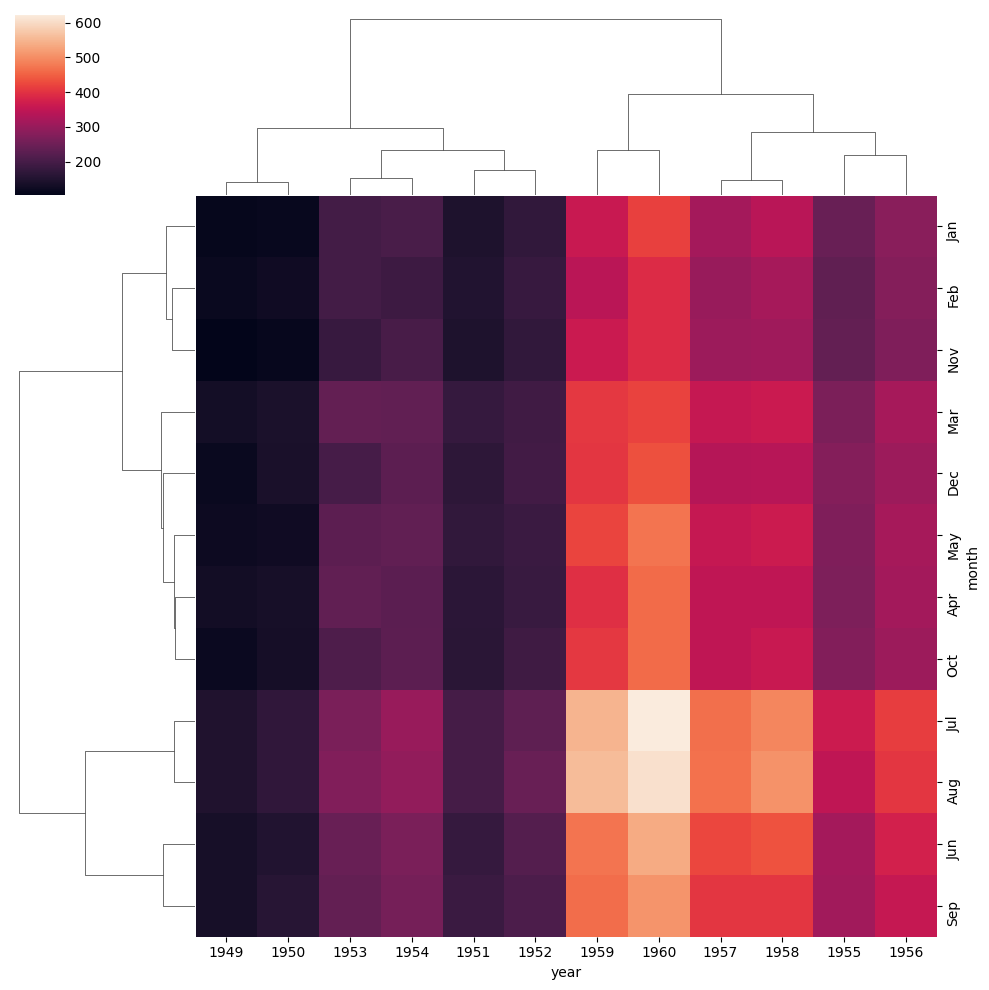

In [ ]:
# brings together those months, and those years which behave similarly
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))

In [ ]:
pd.crosstab(titanic['SibSp'],titanic['Survived'])

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0

gives us dendograms, tells us how close values are

tells about the heirarchial relations in data

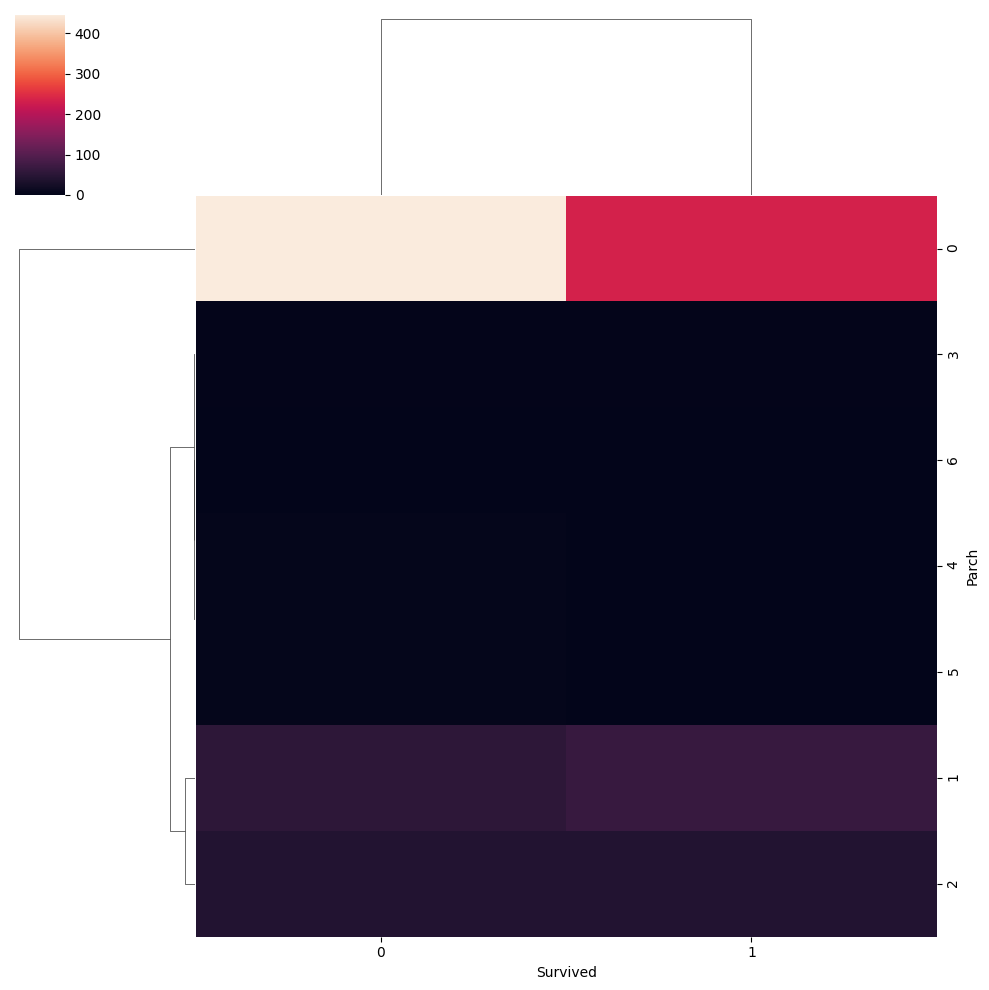

In [ ]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

we can see that people who were travelling with 1/2 (parent,child) had a similar fate in titanic (the death & survival)

people who are travelling with 6(parent,child) had a similar fate with those travelling with 1/2(parent,child)

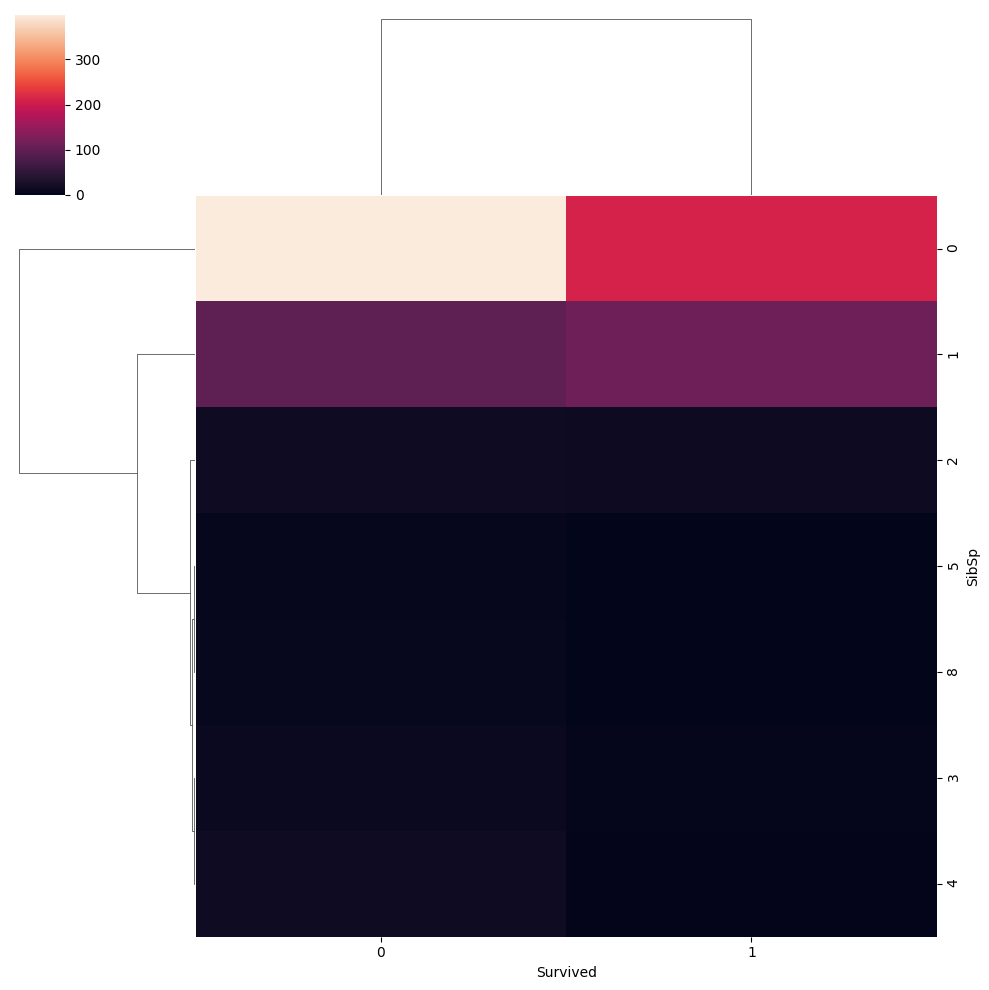

In [ ]:
sns.clustermap(pd.crosstab(titanic['SibSp'],titanic['Survived']))

### PAIRPLOT (COLLECTION OF SCATTER PLOTS)


if you have lots of numerical columns in your data, go for a pairplot to get a birds-eye view of the data

automatically identifies all the numerical columns, and plots a scatterplot of every numerical column with every other numerical column and returns it

#### bivariate

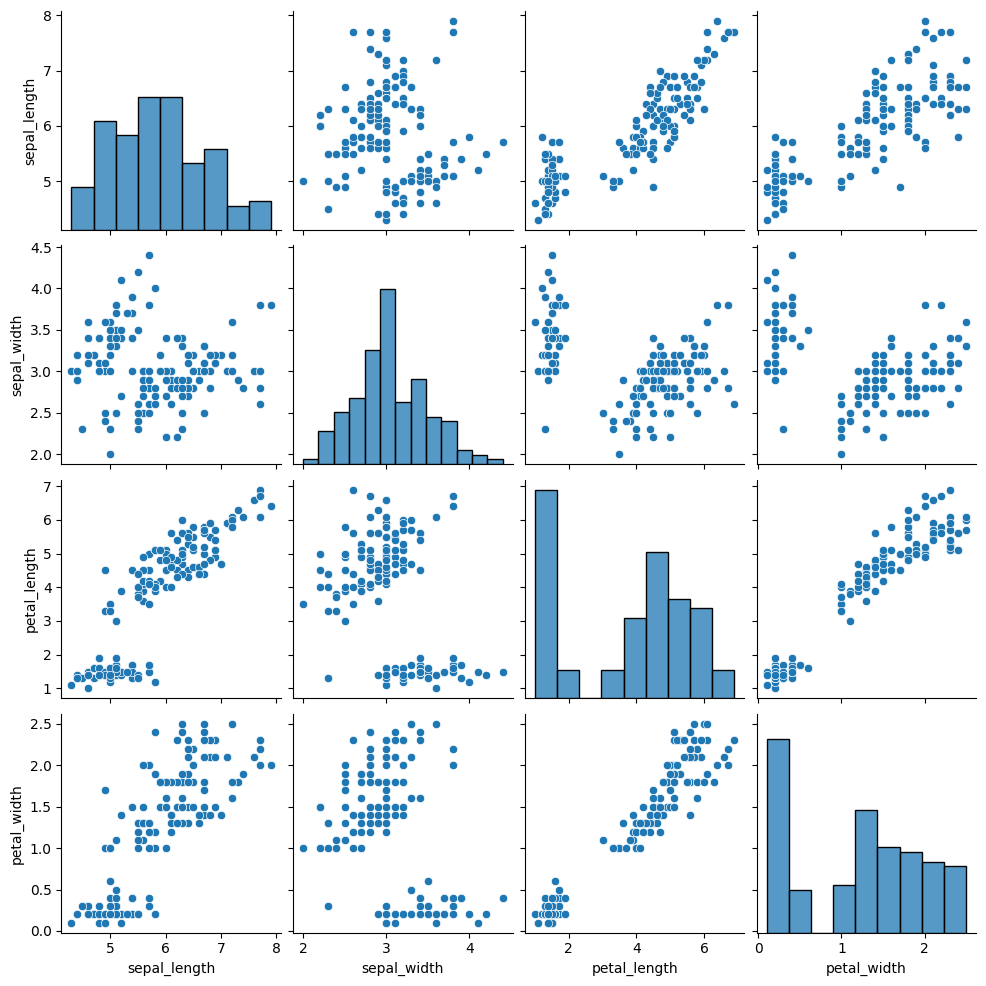

In [ ]:
sns.pairplot(iris)

histogram is plotted when it is plotted against itself

#### multivariate

In [ ]:
iris.head(1)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa

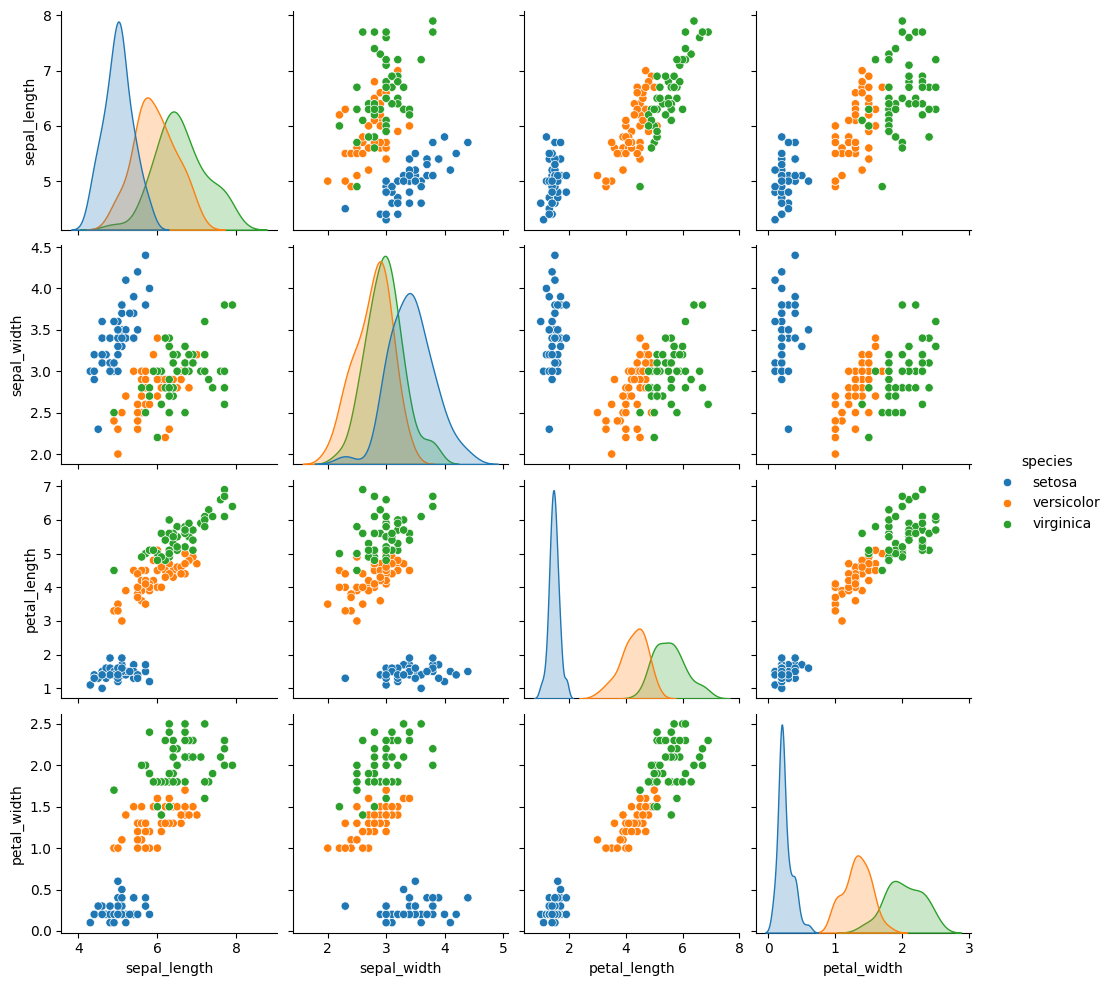

In [ ]:
sns.pairplot(iris,hue='species')

### LINEPLOT (NUMERICAL - NUMERICAL)

if you join all points of a scatterplot -> you get a lineplot

should be used when the quantity of x-axis is a time-based number.

It can be ->


1.   time,day,....
2.   Month
3.   Year
4.   that goes along with time

timeseries data, stock fluctuation, covid numbers inc/dec



In [ ]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
flights.groupby('year')['passengers'].sum().reset_index()

year  passengers
0   1949        1520
1   1950        1676
2   1951        2042
3   1952        2364
4   1953        2700
5   1954        2867
6   1955        3408
7   1956        3939
8   1957        4421
9   1958        4572
10  1959        5140
11  1960        5714

In [ ]:
new = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

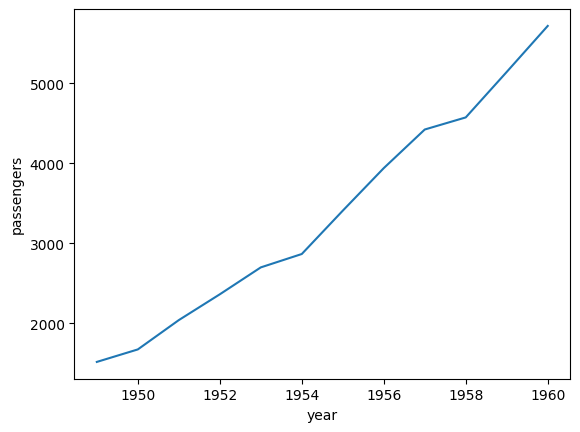

In [ ]:
# pass time based quantity in x axis
sns.lineplot(data=new,x='year',y='passengers')

linear growth of US Airlines can be seen in the data

# PANDAS PROFILING
(AUTOMATING MOST OF THE EDA)

[ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=571f1b3e61c4d19bf452b0d4747e35401f241335c20d7de9ca758329ba09bffb
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3
  Attempting uninstall: 

In [ ]:
!pip install --upgrade ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0.2
    Uninstalling multimethod-2.0.2:
      Successfully uninstalled multimethod-2.0.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.46.0
    Uninstalling llvmlite-0.46.0:
      Successfully uninstalled llvmlite-0.46.0
  Attempting uninstall: numba
    Found existing installation: numba 0.63.1
    Uninstalling numba-0.63.1:
      Successfully uninstalled numba-0.63.1
  Attempting uninstall: visions
    Found e

In [ ]:
import numba
print(numba.__version__)

0.62.1


In [ ]:
import pandas as pd
titanic = pd.read_csv('train.csv')

In [ ]:
from ydata_profiling import ProfileReport
# create an object of the ProfileReport class and pass the dataset
prof = ProfileReport(titanic)
# to generate the html file
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 19.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]



1.   Number of variables -> no. of features/columns
2.   Number of observations -> no of rows
3.   Total cells : #rows * #columns
4.   Missing cells : -> out of the total cells
5.   Avg record size in memory -> size taken by every row



Alerts are very important

1. 'Name' has high cardinality means 'Name' has many categories

Variables

1. Univariate analysis done on each and every column

categorical -> countplot,piechart

numerical -> histogram



Interactions

1. Bivariate analysis is done btw every 2 columns

2. scatterplot given

Correlation (bivariate analysis)

darker shade of blue -> high correlation

Missiig values

more the whitish -> more the missing values

# FEATURE ENGINEERING

## FEATURE SCALING

### Standardisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

User ID  Gender  Age  EstimatedSalary  Purchased
274  15692819  Female   57            26000          1
219  15732987    Male   59           143000          1
198  15745083    Male   26            80000          0
374  15793890  Female   37            80000          0
337  15612465    Male   35            79000          0

In [ ]:
# data processing
df = df.iloc[:,2:]
df.sample(5)

Age  EstimatedSalary  Purchased
157   29            75000          0
0     19            19000          0
385   56            60000          1
398   36            33000          0
238   46            82000          0

it is recommended to first perform train test split for feature scaling (standardisation , normalisation)

In [ ]:
from sklearn.model_selection import train_test_split


In pandas, when you specify axis=1, you are referring to operations that should be performed column-wise. Conversely, axis=0 refers to row-wise operations.

In [ ]:
df.drop('Purchased', axis=1)

Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

70% train, 30% test

In [ ]:
(70*400)/100


280.0

In [ ]:
train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

[     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 216   49            65000
 259   45           131000
 49    31            89000
 238   46            82000
 343   47            51000
 
 [120 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 216    0
 259    1
 49     0
 238    0
 343    1
 Name: Purchased, Length: 120, dt

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(280, 2)

In [ ]:
X_test.shape

(120, 2)

**Standard Scaler**

**we make it learn by fitting the x_train, which means we pass 2 columns (age,salary) it learns how the values are and it does 2 things :
1. finding the mean of both age and salary and store in scaler object
2. finding the standard deviation of both age and salary and stores in scaler object

In [ ]:
from sklearn.preprocessing import StandardScaler
# make an object of this class
scaler = StandardScaler()
# fit the scaler to the train set and it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
scaler.scale_

array([1.01999375e+01, 3.45792870e+04])

remember : it learns only from X_train but transforms both X_train and X_test

In [ ]:
X_test.head()

Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000

In [ ]:
# test set val 1 transformation
(30-3.78642857e+01)/1.01999375e+01

-0.7710131263059212

In [ ]:
# test set val 2 transformation
(38-3.78642857e+01)/1.01999375e+01

0.013305405057628686

In [ ]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

problem in standard scaler is that when we pass the training set (X_train) it is a dataframe -> but it returns a numpy array

so convert it into a dataframe

In [ ]:
X_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

since it is a numpy array it doesnt have column names we pass it from X_train

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_test.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:

X_train.describe()

Age  EstimatedSalary
count  280.000000       280.000000
mean    37.864286     69807.142857
std     10.218201     34641.201654
min     18.000000     15000.000000
25%     30.000000     43000.000000
50%     37.000000     70500.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000

In [ ]:
# round the values to 1 decimal place
np.round(X_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [ ]:
X_train_scaled

Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]

In [ ]:
X_test_scaled

Age  EstimatedSalary
0   -0.771013         0.497201
1    0.013305        -0.572804
2   -0.280814         0.150172
3   -0.771013         0.265849
4   -0.280814        -0.572804
..        ...              ...
115  1.091743        -0.139018
116  0.699584         1.769639
117 -0.672973         0.555039
118  0.797624         0.352606
119  0.895664        -0.543885

[120 rows x 2 columns]

original mean and standard deviation

In [ ]:
# round the values to 1 decimal place
np.round(X_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

after transformation

In [ ]:
np.round(X_train_scaled.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

we can see that mean=0, sd=1

#### EFFECTS OF SCALING

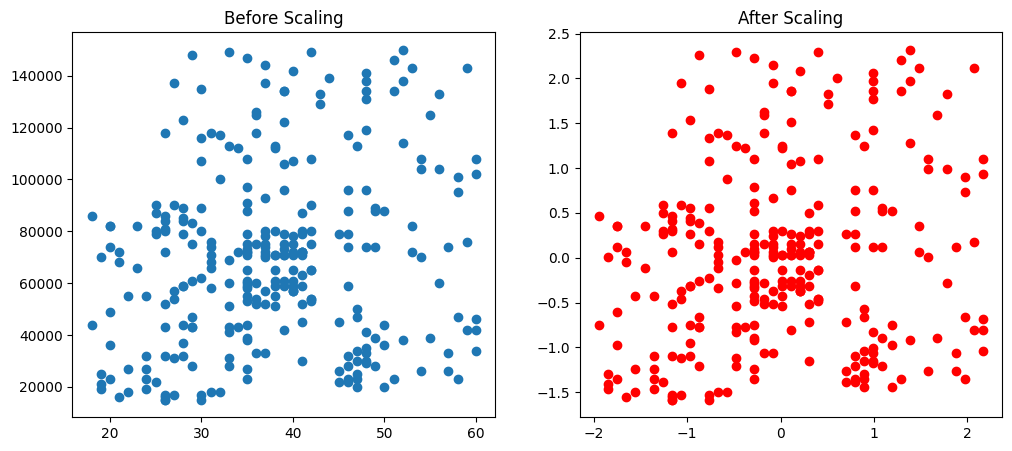

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

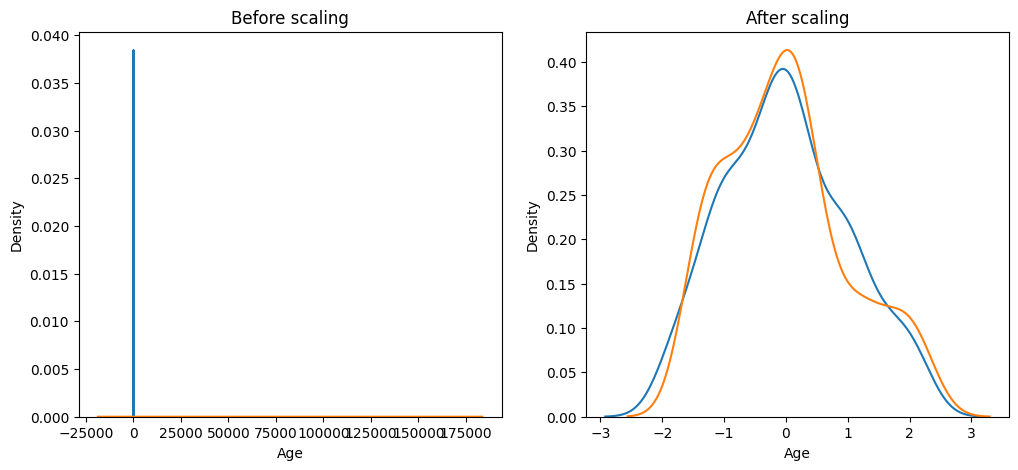

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

we can see that after scaling age and salary are comparable making it efficient to provide it into ml algo yielding better performance

**Comparision of Distributions**

age

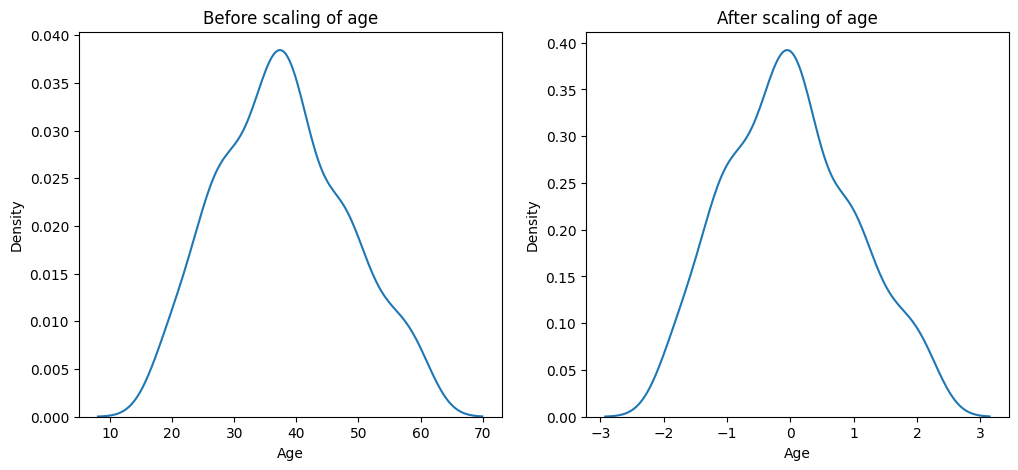

In [ ]:
# before scaling of age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling of age')
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling of age
ax2.set_title('After scaling of age')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

**salary**

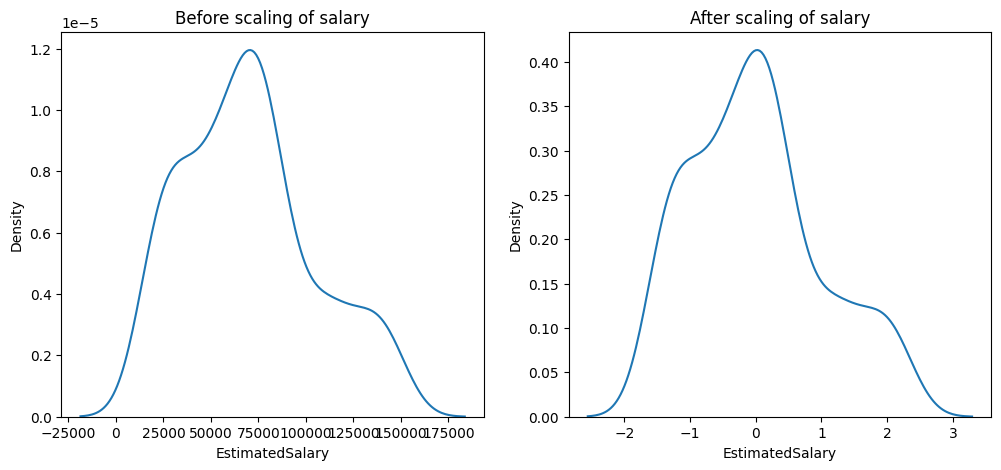

In [ ]:
# before scaling of age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling of salary')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling of age
ax2.set_title('After scaling of salary')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

we can see that distribution remains the same i.e the data remains the same, only the scale changes

shape of the distribution remains intact, just scale changes
mean becomes 0, standard deviation becomes 1

**Scaling is very important in Logistic regression**

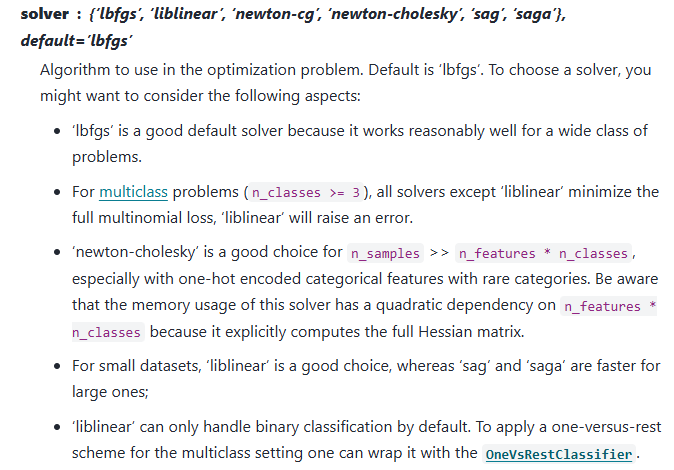

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

class sklearn.linear_model.LogisticRegression(penalty='deprecated', *, C=1.0, l1_ratio=0.0, dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None)

default solver : 'lbfgs'

for smaller datasets use liblinear

In [ ]:
# for smaller datasets use liblinear

In [ ]:
from sklearn.linear_model import LogisticRegression

# create 2 objects,one for unscaled the other for scaled.
lr_not_scaled = LogisticRegression(solver='liblinear')
lr_scaled = LogisticRegression(solver='liblinear')

In [ ]:
# train the first object on unscaled values
lr_not_scaled.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# train the second object on scaled values
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_not_scaled = lr_not_scaled.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score without scaling", accuracy_score(y_test,y_pred_not_scaled))

Accuracy score without scaling 0.6583333333333333


In [ ]:
print("Accuracy score with scaling",accuracy_score(y_test,y_pred_scaled))

Accuracy score with scaling 0.875


There is no impact of scaling on Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_not_scaled = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt_not_scaled.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_not_scaled = dt_not_scaled.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Accuracy score of dt without scaling",accuracy_score(y_test,y_pred_not_scaled))
print("Accuaracy score of dt with scaling", accuracy_score(y_test,y_pred_scaled))

Accuracy score of dt without scaling 0.875
Accuaracy score of dt with scaling 0.875


we can see that scaling has no impact on decision tree

In [ ]:
df.head(1)

Age  EstimatedSalary  Purchased
0   19            19000          0

In [ ]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

In [ ]:
extra_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
new_df = pd.concat([df,extra_df],ignore_index=True)
new_df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]

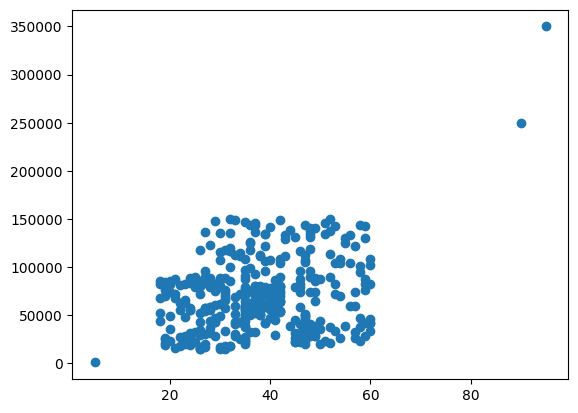

In [ ]:
plt.scatter(new_df['Age'],new_df['EstimatedSalary'])

##### let us see if there is any impact on outliers ?

In [ ]:
# use new_df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_df.head(1)

Age  EstimatedSalary  Purchased
0   19            19000          0

extra points (2 - in train, 1 -in test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('Purchased',axis=1),new_df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(282, 2)

In [ ]:
X_test.shape

(121, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# train to find mean,standard deviation of both the input columns (age,salary)
# learn from the training data, transform both train and test data
# gives original mean and sd of age,salary
scaler.fit(X_train)

StandardScaler()

In [ ]:
# transform X_train
X_train_scaled = scaler.transform(X_train)

In [ ]:
# transform X_test
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

[]

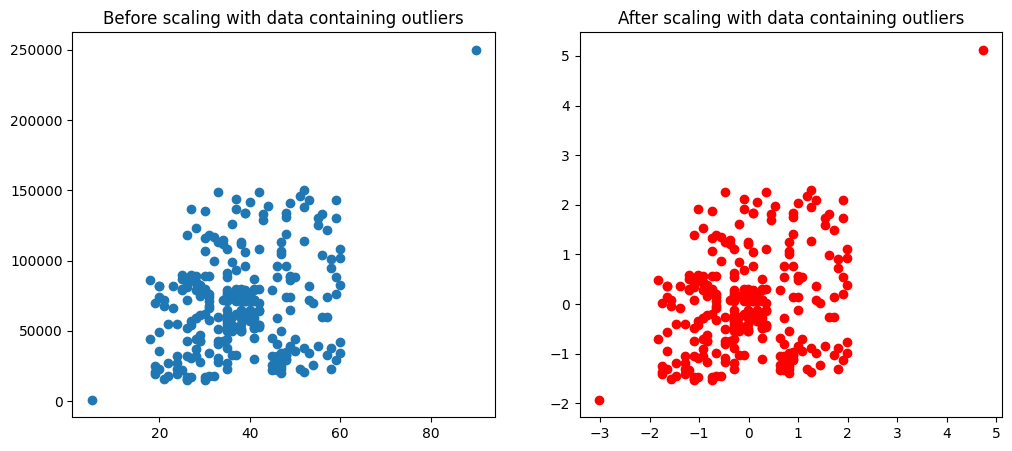

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('Before scaling with data containing outliers')
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title('After scaling with data containing outliers')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.plot()

### NORMALISATION

#### MIN-MAX SCALING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

use header=None, when there is a row acting as a header

In [ ]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [ ]:
df.head()

Class Label  Alcohol  Malic Acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

we can see that the magnitude of values in alcohol is large compared to values in Malic Acid

<Axes: xlabel='Alcohol', ylabel='Density'>

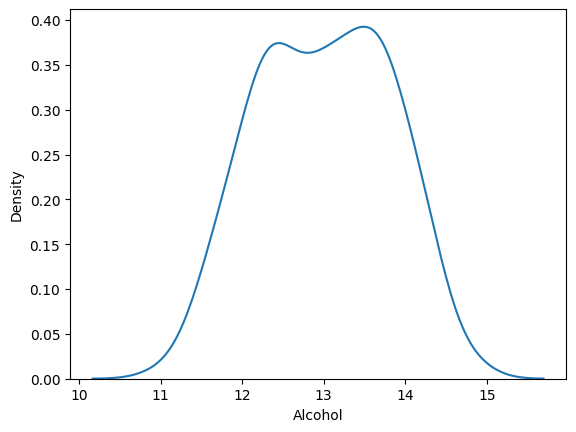

In [ ]:
#pdf
sns.kdeplot(df['Alcohol'])

looks like a normal distribution sort of

<Axes: xlabel='Malic Acid', ylabel='Density'>

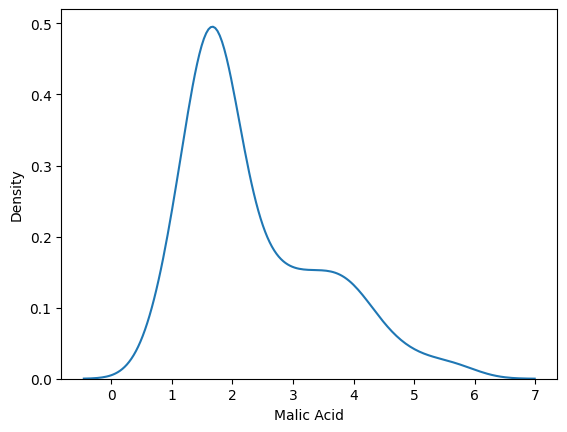

In [ ]:
# pdf
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

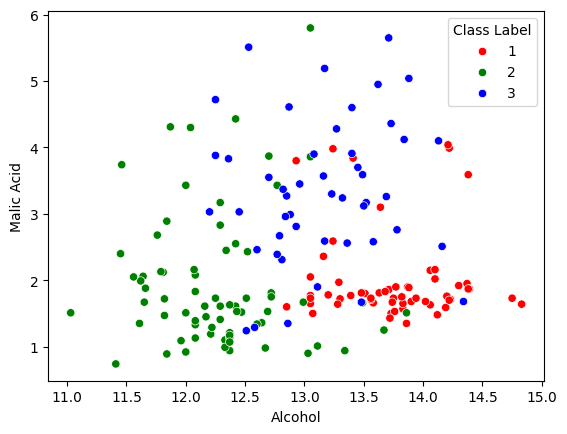

In [ ]:
color_pallete={1:'red',2:'green',3:'blue'}
sns.scatterplot(df,x='Alcohol',y='Malic Acid',hue='Class Label',palette=color_pallete)

In [ ]:
df.shape

(178, 3)

Before any type of scaling -> always do a train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(124, 2)

In [ ]:
X_test.shape

(54, 2)

In [ ]:
y_train.shape

(124,)

In [ ]:
y_test.shape

(54,)

In [ ]:
X_train['Alcohol'].min()

11.03

In [ ]:
X_train['Malic Acid'].min()

0.89

Always fit the scaler to the train set, it will learn the parameters.

But transform both the train and test sets.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaler.data_min_

array([11.03,  0.89])

In [ ]:
scaler.data_max_

array([14.75,  5.65])

scaler will store min and max values of each column of the original data and use that in the transformation formula of min max scaling to transform both the train and test sets

In [ ]:
# transforming train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.columns

Index(['Alcohol', 'Malic Acid'], dtype='object')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_train_scaled.head(1)

Alcohol  Malic Acid
0  0.72043    0.203782

In [ ]:
X_test.columns

Index(['Alcohol', 'Malic Acid'], dtype='object')

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_test_scaled.head(1)

Alcohol  Malic Acid
0  0.728495    0.163866

In [ ]:
np.round(X_train.describe(),1)

Alcohol  Malic Acid
count    124.0       124.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6

in original data we had min=11.0 max=14.8 for alcohol

after transformation

Xi' = (Xi - Xmin)/(Xmax - Xmin)

and replace Xi with Xmin = 11.0

and replace Xi with Xmax = 14.8

so the min value after transformation becomes 0, and max value becomes 1 for the column alcohol



In [ ]:
np.round(X_train_scaled.describe(),1)

Alcohol  Malic Acid
count    124.0       124.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.2
50%        0.5         0.2
75%        0.7         0.5
max        1.0         1.0

In [ ]:
y_train.head(1)

22    1
Name: Class Label, dtype: int64

min and max values of both the features are 0 and 1 respectively

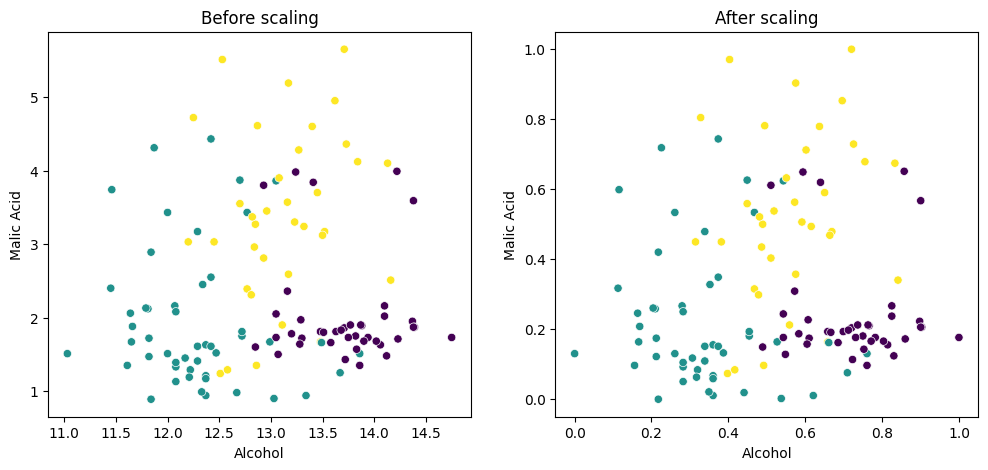

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.scatterplot(data=X_train,x='Alcohol',y='Malic Acid',c=y_train,ax=ax1)

ax2.set_title('After scaling')
sns.scatterplot(data=X_train_scaled,x='Alcohol',y='Malic Acid',c=y_train,ax=ax2)
plt.show()

we can see that the entire data is squished between 0 to 1 after scaling

kde plot

In [ ]:
X_train.head(1)

Alcohol  Malic Acid
22    13.71        1.86

<Axes: title={'center': 'PDF after scaling'}, xlabel='Alcohol', ylabel='Density'>

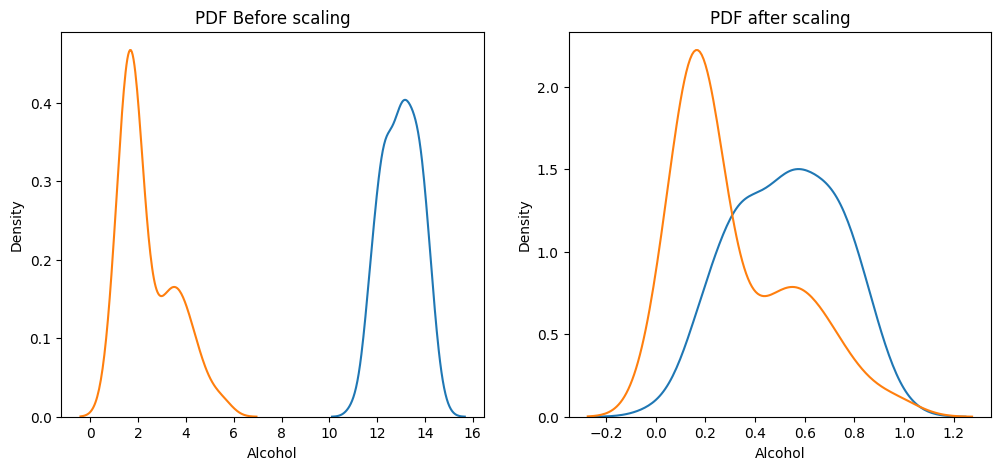

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('PDF Before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title('PDF after scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

before scaling , malic acid was in the range of 0-6 , and alcohol was in the range of 10-16

after scaling, malic acid and alcohol both are in the range of 0 to 1.

since everything is being squished between 0 and 1, the impact of outliers will also be squished inside which is kinda bad, but other than that , everything is great

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv',usecols=[2,3,4])

In [ ]:
df.head(1)

Age  EstimatedSalary  Purchased
0   19            19000          0

In [ ]:
extra_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
new_df = pd.concat([df,extra_df],ignore_index=True)
new_df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]

In [ ]:
new_df['Age'].max()

95

Text(0.5, 1.0, 'Outliers in data before scaling')

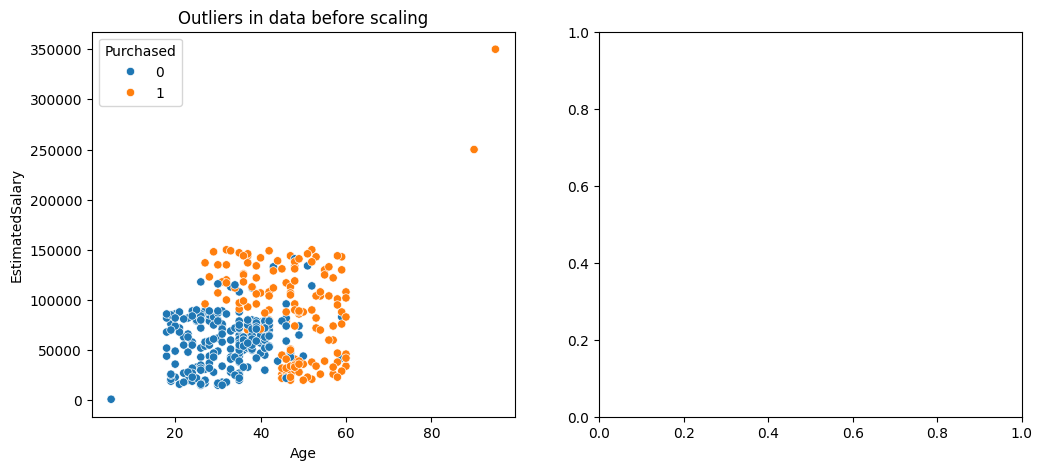

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.scatterplot(data=new_df,x='Age',y='EstimatedSalary',hue='Purchased',ax=ax1)
ax1.set_title('Outliers in data before scaling')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('Purchased',axis=1),new_df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rob_scaler = RobustScaler()

In [ ]:
# fit the training data
rob_scaler.fit(X_train)

RobustScaler()

In [ ]:
# transform train and test data
X_train_scaled = rob_scaler.transform(X_train)
X_test_scaled = rob_scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

Text(0.5, 1.0, 'Outliers in data after Robut Scaling')

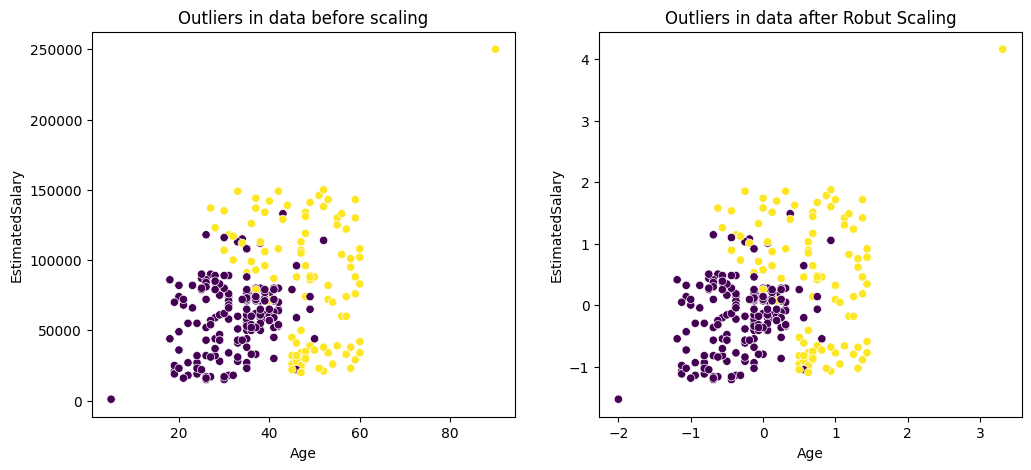

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.scatterplot(data=X_train,x='Age',y='EstimatedSalary',c=y_train,ax=ax1)
ax1.set_title('Outliers in data before scaling')

sns.scatterplot(data=X_train_scaled,x='Age',y='EstimatedSalary',c=y_train,ax=ax2)
ax2.set_title('Outliers in data after Robut Scaling')

While the outliers are still present, they are not compressed into the main cluster unlike MinMax scaler.

fit method -> learns the median and interquartile range of the original distribution and uses it to transform the train and test sets

In [ ]:
np.round(X_train.describe())

Age  EstimatedSalary
count  282.0            282.0
mean    38.0          69138.0
std     11.0          35358.0
min      5.0           1000.0
25%     30.0          43000.0
50%     37.0          68000.0
75%     46.0          86750.0
max     90.0         250000.0

In [ ]:
np.round(X_train_scaled.describe())

Age  EstimatedSalary
count  282.0            282.0
mean     0.0              0.0
std      1.0              1.0
min     -2.0             -2.0
25%     -0.0             -1.0
50%      0.0              0.0
75%      1.0              0.0
max      3.0              4.0

<Axes: title={'center': 'PDF after scaling'}, xlabel='Age', ylabel='Density'>

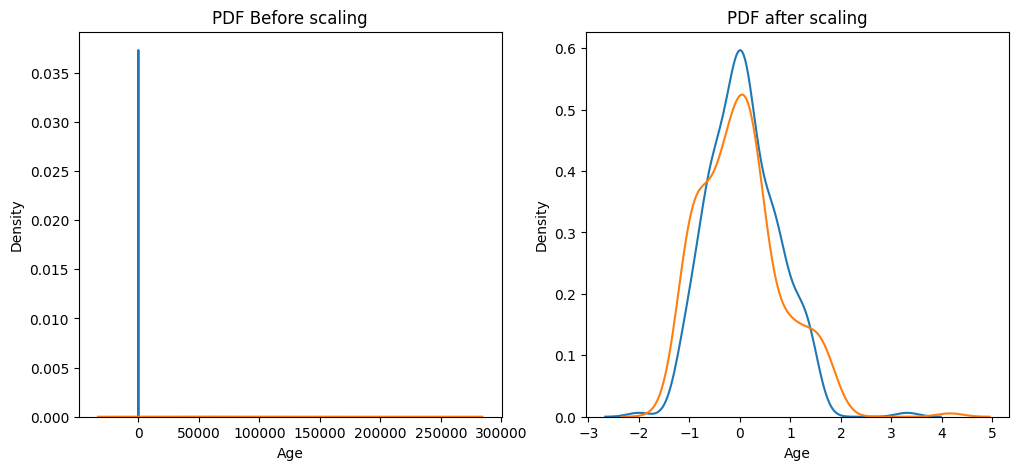

In [ ]:
# kde plot
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('PDF Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('PDF after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

In [ ]:
# median
rob_scaler.center_

array([3.7e+01, 6.8e+04])

In [ ]:
# interquartile range
rob_scaler.scale_

array([1.600e+01, 4.375e+04])

###### ALL ABOUT SCALING

Scaling Procedure :
1) Before any type of scaling, always do a train test split.

2) Always fit the scaler to the train set, it will learn the parameters.

-In case of StandardScaler : the parameters learnt are mean and standard deviation of the training data.

-In case of MinMaxScaler : the parameters learnt are min and max values of the training data

-In case of Mean Normalisation : the parameters learnt are mean,max,min values of the training data

-In case of MaxAbsScaler : the parameters learnt are maximum absolute value of the training data.

-In case of RobustScaler : the parameters learnt are median and interquartile range of the training data.

3) Then using these parameters transform the training and the test sets.

###### When to use normalisation vs Standardisation ?
1) Ask if feature scaling is required ?

2) most of the problems will be solved using standardisation.

3) Normalisation has 4 techniques :

-> Minmax scaling : to be used when you know beforehand, the min and max value of your numerical quantity.
Real life usecase : During image processing, we use CNN, and the color channels min value=0, max value=255, in this case we use MinMaxScaler.

-> Robust scaling : when your data has outliers

-> Mean Normalisation : when you are working with centered data

-> Max absolute scaling : when dealing with sparse data (meaning lots of 0's) , sparse matrix...

4) When you have no idea -> go with Standard Scaler.


### ENCODING CATEGORICAL DATA

#### ORDINAL ENCODING

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('customer.csv')

In [ ]:
df.sample(5)

age  gender review education purchased
15   75    Male   Poor        UG        No
43   27    Male   Poor        PG        No
49   25  Female   Good        UG        No
36   34  Female   Good        UG       Yes
38   45  Female   Good    School        No

where there is no order - we will apply nominal encoding via one hot encoding , i.e applied on gender

when there is order - we will apply ordinal encoding (and it shd be ordinal categorical data) , ie applied on review and education because

Good > Avg >Poor
PG>UG>School

there is order.

Ordinal categorical data when in the input column -> ordinal encoding

If target column is a categorical data -> we will apply label encoding.



In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.head()

review education purchased
0  Average    School        No
1     Poor        UG        No
2     Good        PG        No
3     Good        PG        No
4  Average        UG        No

In [ ]:
df.head(46)

review education purchased
0   Average    School        No
1      Poor        UG        No
2      Good        PG        No
3      Good        PG        No
4   Average        UG        No
5   Average    School       Yes
6      Good    School        No
7      Poor    School       Yes
8   Average        UG        No
9      Good        UG       Yes
10     Good        UG       Yes
11     Good        UG       Yes
12     Poor    School        No
13  Average    School        No
14     Poor        PG       Yes
15     Poor        UG        No
16     Poor        UG       Yes
17     Poor        UG       Yes
18     Good    School        No
19     Poor        PG       Yes
20  Average    School       Yes
21  Average        PG        No
22     Poor        PG       Yes
23     Good    School        No
24  Average        PG       Yes
25     Good    School        No
26     Poor        PG        No
27     Poor        PG        No
28     Poor    School        No
29  Average        UG       Yes
30  Average        UG        No
31     Poor    School       Yes
32  Average        UG       Yes
33     Good        PG       Yes
34  Average    School        No
35     Poor    School       Yes
36     Good        UG       Yes
37  Average        PG       Yes
38     Good    School        No
39     Poor        PG        No
40     Good    School        No
41     Good        PG       Yes
42     Good        PG       Yes
43     Poor        PG        No
44  Average        UG        No
45     Poor        PG       Yes

before feature transformation always do train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('purchased',axis=1),df['purchased'],test_size=0.2,random_state=41)

In [ ]:
X_train.shape

(40, 2)

In [ ]:
X_test.shape

(10, 2)

In [ ]:
y_train.shape

(40,)

In [ ]:
y_test.shape

(10,)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_train.head(4)

review education
45     Poor        PG
29  Average        UG
5   Average    School
31     Poor    School

In [ ]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [ ]:
# fit on train
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

poor gets the least value , good gets the highest value

school gets the least value, pg gets the highest value

if we dont mention the categories, then the value will be randomised

during training it will learn the categories present in the categorical columns of the input

In [ ]:
X_train_transformed = oe.transform(X_train)
X_test_transformed = oe.transform(X_test)

In [ ]:
X_train.head(5)

review education
45     Poor        PG
29  Average        UG
5   Average    School
31     Poor    School
39     Poor        PG

In [ ]:
X_train_transformed[0]

array([0., 2.])

In [ ]:
X_train_transformed[4]

array([0., 2.])

In [ ]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

#### LABEL ENCODER

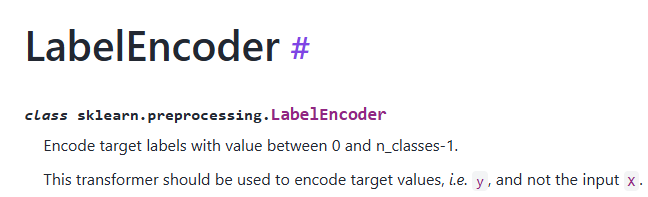

if 3 classes :
0 to 3-1 i.e 0 to 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# fit on training data
# label encoder is only applied on target column
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)

In [ ]:
y_train.head(10)

45    Yes
29    Yes
5     Yes
31    Yes
39     No
30     No
33    Yes
47    Yes
44     No
4      No
Name: purchased, dtype: object

In [ ]:
y_train_transformed[9]

np.int64(0)

here no is assigned 0, and yes is assigned 1.

#### ONE HOT ENCODING

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [ ]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64



> Series.nunique(dropna=True)[source]
Return number of unique elements in the object.



In [ ]:
df['brand'].nunique()

32

In [ ]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [ ]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

##### One hot encoding using pandas

> pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [ ]:
# apply encoding on these columns by passing it as a list
pd.get_dummies(df,columns=['fuel','owner'])

brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_LPG  \
0      Maruti     145500         450000     False         True     False   
1       Skoda     120000         370000     False         True     False   
2       Honda     140000         158000     False        False     False   
3     Hyundai     127000         225000     False         True     False   
4      Maruti     120000         130000     False        False     False   
...       ...        ...            ...       ...          ...       ...   
8123  Hyundai     110000         320000     False        False     False   
8124  Hyundai     119000         135000     False         True     False   
8125   Maruti     120000         382000     False         True     False   
8126     Tata      25000         290000     False         True     False   
8127     Tata      25000         290000     False         True     False   

      fuel_Petrol  owner_First Owner  owner_Fourth & Above Owner  \
0           False               True                       False   
1           False              False                       False   
2            True              False                       False   
3           False               True                       False   
4            True               True                       False   
...           ...                ...                         ...   
8123         True               True                       False   
8124        False              False                        True   
8125        False               True                       False   
8126        False               True                       False   
8127        False               True                       False   

      owner_Second Owner  owner_Test Drive Car  owner_Third Owner  
0                  False                 False              False  
1                   True                 False              False  
2                  False                 False               True  
3                  False                 False              False  
4                  False                 False              False  
...                  ...                   ...                ...  
8123               False                 False              False  
8124               False                 False              False  
8125               False                 False              False  
8126               False                 False              False  
8127               False                 False              False  

[8128 rows x 12 columns]

##### K-1 one hot encoding

> 1st column from both the categories is removed (to solve the problem of multicollinearity)

In [ ]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

brand  km_driven  selling_price  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0      Maruti     145500         450000         True     False        False   
1       Skoda     120000         370000         True     False        False   
2       Honda     140000         158000        False     False         True   
3     Hyundai     127000         225000         True     False        False   
4      Maruti     120000         130000        False     False         True   
...       ...        ...            ...          ...       ...          ...   
8123  Hyundai     110000         320000        False     False         True   
8124  Hyundai     119000         135000         True     False        False   
8125   Maruti     120000         382000         True     False        False   
8126     Tata      25000         290000         True     False        False   
8127     Tata      25000         290000         True     False        False   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                          False               False                 False   
1                          False                True                 False   
2                          False               False                 False   
3                          False               False                 False   
4                          False               False                 False   
...                          ...                 ...                   ...   
8123                       False               False                 False   
8124                        True               False                 False   
8125                       False               False                 False   
8126                       False               False                 False   
8127                       False               False                 False   

      owner_Third Owner  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False  
...                 ...  
8123              False  
8124              False  
8125              False  
8126              False  
8127              False  

[8128 rows x 10 columns]

Limitation using pandas -> it doesnt remember the position of columns that it creates (yes talking about the dummy variables!!)

that is why we use sklearn class OneHotEncoder

##### One hot encoding using sklearn

In [ ]:
df.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=13)

> class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
# if you dont want to convert to array from sparse matrix, make sparse='False'
# to convert float to int , change dtype


In [ ]:
X_train.head()

brand  km_driven    fuel         owner
3612    Maruti      50000  Petrol   First Owner
2186  Mahindra      65000  Diesel  Second Owner
2943    Toyota      25000  Diesel  Second Owner
1896    Maruti      60000  Diesel  Second Owner
4846   Renault      45000  Petrol  Second Owner

In [ ]:
X_train[['fuel','owner']]

fuel                 owner
3612  Petrol           First Owner
2186  Diesel          Second Owner
2943  Diesel          Second Owner
1896  Diesel          Second Owner
4846  Petrol          Second Owner
...      ...                   ...
2790  Diesel          Second Owner
7696  Petrol           First Owner
74    Diesel           First Owner
6320  Petrol          Second Owner
338   Diesel  Fourth & Above Owner

[6502 rows x 2 columns]

one hot encoder by default produces a sparse matrix

4 fuel + 5 owner

when we do drop='first', first category of both the columns is dropped

In [ ]:
ohe.fit_transform(X_train[['fuel','owner']])

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
type(ohe.fit_transform(X_train[['fuel','owner']]))

numpy.ndarray

returns an object of class csr_matrix which has a method toarray()

> scipy.sparse.csr_matrix.
toarray
toarray(order=None, out=None)[source]
Return a dense ndarray representation of this sparse array/matrix.

In [ ]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [ ]:
X_train_new

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
X_train[['brand','km_driven']].values

array([['Maruti', 50000],
       ['Mahindra', 65000],
       ['Toyota', 25000],
       ...,
       ['Maruti', 70000],
       ['Maruti', 70000],
       ['Maruti', 90000]], dtype=object)

horizontally stack them

In [ ]:
# pass both the numpy arrays in the tuple
np.hstack((X_train[['brand','km_driven']],X_train_new))

array([['Maruti', 50000, 0, ..., 0, 0, 0],
       ['Mahindra', 65000, 1, ..., 1, 0, 0],
       ['Toyota', 25000, 1, ..., 1, 0, 0],
       ...,
       ['Maruti', 70000, 1, ..., 0, 0, 0],
       ['Maruti', 70000, 0, ..., 1, 0, 0],
       ['Maruti', 90000, 1, ..., 0, 0, 0]], dtype=object)

In [ ]:
np.hstack((X_train[['brand','km_driven']],X_train_new)).shape

(6502, 9)

##### **One hot encoding with top categories**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [ ]:
# dealing with column that has lots of categories in it
counts = df['brand'].value_counts()

In [ ]:
threshold = 100
(counts <= threshold)


brand
Maruti           False
Hyundai          False
Mahindra         False
Tata             False
Toyota           False
Honda            False
Ford             False
Chevrolet        False
Renault          False
Volkswagen       False
BMW              False
Skoda            False
Nissan            True
Jaguar            True
Volvo             True
Datsun            True
Mercedes-Benz     True
Fiat              True
Audi              True
Lexus             True
Jeep              True
Mitsubishi        True
Land              True
Force             True
Isuzu             True
Ambassador        True
Kia               True
MG                True
Daewoo            True
Ashok             True
Opel              True
Peugeot           True
Name: count, dtype: bool

In [ ]:
repl = counts[counts <= threshold].index
repl

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [ ]:
pd.get_dummies(df['brand'].replace(repl,'uncommon'),dtype=np.int32).sample(5)

BMW  Chevrolet  Ford  Honda  Hyundai  Mahindra  Maruti  Renault  Skoda  \
5012    0          0     0      0        1         0       0        0      0   
7124    0          0     0      0        0         0       0        0      0   
7384    0          0     0      0        0         0       1        0      0   
5477    0          0     1      0        0         0       0        0      0   
4791    0          0     0      0        0         0       0        0      0   

      Tata  Toyota  Volkswagen  uncommon  
5012     0       0           0         0  
7124     0       0           0         1  
7384     0       0           0         0  
5477     0       0           0         0  
4791     0       1           0         0

##### **COLUMN TRANSFORMER**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv('covid_toy.csv')

In [ ]:
df.head()

age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

**always do a train test split first**

In [ ]:
df.head(1)

age gender  fever cough     city has_covid
0   60   Male  103.0  Mild  Kolkata        No

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2,random_state=13)

In [ ]:
X_train

age  gender  fever   cough       city
3    31  Female   98.0    Mild    Kolkata
4    65  Female  101.0    Mild     Mumbai
90   59  Female   99.0  Strong      Delhi
72   83  Female  101.0    Mild    Kolkata
20   12    Male   98.0  Strong  Bangalore
..  ...     ...    ...     ...        ...
25   23    Male    NaN    Mild     Mumbai
16   69  Female  103.0    Mild    Kolkata
74   34  Female  104.0  Strong      Delhi
48   66    Male   99.0  Strong  Bangalore
82   24    Male   98.0    Mild    Kolkata

[80 rows x 5 columns]

In [ ]:
y_train

3      No
4      No
90     No
72     No
20     No
     ... 
25     No
16    Yes
74     No
48     No
82    Yes
Name: has_covid, Length: 80, dtype: object

##### **LIFE WITHOUT COLUMN TRANSFORMER**

In [ ]:
df.head(1)

age gender  fever cough     city has_covid
0   60   Male  103.0  Mild  Kolkata        No

we can see that
1. Age is perfect (we can scale it tho)
2. gender,city is nominal categorical data (i.e no order)
3. fever has missing values
4. cough has 2 values i.e mild and strong which means ordinal categorical data (i.e order is present where mild < strong)
5. has_covid is target value, which is label encoder categorical data

In [ ]:
# add simple imputer to fever column
# to fill the missing values by the mean of that data in the column
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_train_fever

array([[ 98.        ],
       [101.        ],
       [ 99.        ],
       [101.        ],
       [ 98.        ],
       [104.        ],
       [100.        ],
       [101.        ],
       [103.        ],
       [104.        ],
       [103.        ],
       [102.        ],
       [100.        ],
       [102.        ],
       [100.        ],
       [100.        ],
       [ 98.        ],
       [ 98.        ],
       [102.        ],
       [104.        ],
       [ 99.        ],
       [103.        ],
       [ 99.        ],
       [101.        ],
       [101.        ],
       [101.        ],
       [104.        ],
       [ 98.        ],
       [104.        ],
       [100.76712329],
       [ 98.        ],
       [ 99.        ],
       [101.        ],
       [101.        ],
       [103.        ],
       [100.76712329],
       [102.        ],
       [101.        ],
       [ 98.        ],
       [102.        ],
       [100.76712329],
       [ 99.        ],
       [102.        ],
       [100

In [ ]:
# transform the test data
X_test_fever = si.transform(X_test[['fever']])
X_test_fever.shape

(20, 1)

In [ ]:
# now apply ordinal encoding on cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.transform(X_test[['cough']])

In [ ]:
X_train.head()

age  gender  fever   cough       city
3    31  Female   98.0    Mild    Kolkata
4    65  Female  101.0    Mild     Mumbai
90   59  Female   99.0  Strong      Delhi
72   83  Female  101.0    Mild    Kolkata
20   12    Male   98.0  Strong  Bangalore

In [ ]:
X_train_cough[2]

array([1.])

In [ ]:
# apply one hot encoding on gender,city
# to solve multicollinearity problem, drop first column in both gender and city
# and to get numpy array instead of sparse matrix set sparse as False
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])
X_test_gender_city = ohe.transform(X_test[['gender','city']])
X_train_gender_city


array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0,

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y_train_transformed = le.fit_transform(y_train)
y_test_transformed = le.transform(y_test)
y_train_transformed

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_train.head(6)

3      No
4      No
90     No
72     No
20     No
59    Yes
Name: has_covid, dtype: object

In [ ]:
# extract age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values


In [ ]:
# concatenate the numpy arrays
# age with the rest
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

In [ ]:
X_train_transformed.shape

(80, 7)

7 -> age + fever + (1 gender) + (3 cities) + (cough)

##### **LIFE WITH COLUMN TRANSFORMER**

In [ ]:
from sklearn.compose import ColumnTransformer

apply columntransformer on specific columns, and on the remaining columns you either keep them which is "passthrough" or else you "drop" them

In [ ]:
df =pd.read_csv('covid_toy.csv')

In [ ]:
transformer_feature = ColumnTransformer(transformers=[
    # we pass 3 things in the tuple
    # transformer name, object of transformer class,columns on which tranformation to be applied
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(drop='first',sparse_output=False),['gender','city'])

], remainder='passthrough')

In [ ]:
df.head(1)

age gender  fever cough     city has_covid
0   60   Male  103.0  Mild  Kolkata        No

In [ ]:
transformer_feature.fit_transform(X_train).shape

(80, 7)

In [ ]:
transformer_feature.transform(X_test).shape

(20, 7)

# MACHINE LEARNING PIPELINES (SKLEARN)

## **WITHOUT USING PIPELINE**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv('train.csv')
df.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

In [ ]:
# dropping unnecessary columns
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [ ]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

target column = survived

In [ ]:
# step 1 : train test split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=13)

In [ ]:
X_train.head(2)

Pclass   Sex   Age  SibSp  Parch   Fare Embarked
711       1  male   NaN      0      0  26.55        S
525       3  male  40.5      0      0   7.75        Q

In [ ]:
y_train.head(2)

711    0
525    0
Name: Survived, dtype: int64

In [ ]:
# check the no of missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

age and embarked has missing values


In [ ]:
X_train['Embarked'].value_counts()

Embarked
S    517
C    135
Q     58
Name: count, dtype: int64

frequency of S is higher

In [ ]:
# applying imputation
# filling missing values, for age and embarked

si_age = SimpleImputer() # default fills it with mean
si_embarked = SimpleImputer(strategy='most_frequent')

In [ ]:
X_train_age = si_age.fit_transform(X_train[['Age']])
X_test_age = si_age.transform(X_test[['Age']])

In [ ]:
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])


In [ ]:
# Step 2 : apply one hot encoding on sex and embarked
ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')


In [ ]:
X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_test_sex = ohe_sex.transform(X_test[['Sex']])

In [ ]:
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [ ]:
X_train.head(3)

Pclass   Sex   Age  SibSp  Parch     Fare Embarked
711       1  male   NaN      0      0  26.5500        S
525       3  male  40.5      0      0   7.7500        Q
76        3  male   NaN      0      0   7.8958        S

In [ ]:
X_train_embarked

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
print(X_train_embarked.shape)
print(X_train_sex.shape)
print(X_train_age.shape)

(712, 3)
(712, 2)
(712, 1)


now we have 3 transformed columns
1. ohe applied to sex
2. ohe and simple imputing applied to embarked
3. simple imputing applied to age

In [ ]:
X_train.head(2)

Pclass   Sex   Age  SibSp  Parch   Fare Embarked
711       1  male   NaN      0      0  26.55        S
525       3  male  40.5      0      0   7.75        Q

In [ ]:
## remaining columns are
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [ ]:
print(X_train_rem.shape)

(712, 4)


In [ ]:
# concatenating remaining columns with transformed columns
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)




(1 pclass + 1 fare + 1 sibsp+ 1 parch + 2 genders + 3 embarked + 1 age =  10 columns)

In [ ]:
X_train_transformed.shape

(712, 10)

In [ ]:
X_test_transformed.shape

(179, 10)

In [ ]:
#training the model
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)


DecisionTreeClassifier()

In [ ]:
y_test.head(5)

736    0
421    0
442    0
196    0
200    0
Name: Survived, dtype: int64

In [ ]:
y_pred = clf.predict(X_test_transformed)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0])

In [ ]:
# calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7597765363128491

In [ ]:
import pickle


> pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)

>Return the pickled representation of the object obj as a bytes object, instead of writing it to a file.

In [ ]:
# encode
pickle.dump(ohe_sex,open('/content/sample_data/models/ohe_sex.pkl','wb'))
pickle.dump(ohe_embarked,open('/content/sample_data/models/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('/content/sample_data/models/clf.pkl','wb'))

> pickle.load(file, *, fix_imports=True, encoding='ASCII', errors='strict', buffers=None)
Read the pickled representation of an object from the open file object file and return the reconstituted object hierarchy specified therein.

In [ ]:
# convert obj to pickle representation and back to obj representation
ohe_sex = pickle.load(open('/content/sample_data/models/ohe_sex.pkl','rb'))
ohe_embarked = pickle.load(open('/content/sample_data/models/ohe_embarked.pkl','rb'))
clf = pickle.load(open('/content/sample_data/models/clf.pkl','rb'))


In [ ]:
X_test_transformed[0]

array([ 3.   ,  1.   ,  3.   , 34.375, 48.   ,  1.   ,  0.   ,  0.   ,
        0.   ,  1.   ])

In [ ]:
# Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
test_input = np.array([[2,'male',31.0,0,0,10.5,'S']],dtype=object)
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [ ]:
test_input[:,1].reshape(1,1)

array([['male']], dtype=object)

In [ ]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
test_input_sex

array([[0., 1.]])

In [ ]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))

In [ ]:
test_input_embarked

array([[0., 0., 1.]])

In [ ]:
test_input_age = test_input[:,2].reshape(1,1)
test_input_age

array([[31.0]], dtype=object)

In [ ]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [ ]:
test_rem = test_input[:,[0,3,4,5]]
test_rem

array([[2, 0, 0, 10.5]], dtype=object)

In [ ]:
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)
test_input_transformed.shape

(1, 10)

In [ ]:
clf.predict(test_input_transformed)

array([0])

## **WITH USING SKLEARN PIPELINE**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

**columns that doesnt help in analysis to be dropped**

In [ ]:

df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

**train test split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=13)

In [ ]:
X_train.head()

Pclass   Sex   Age  SibSp  Parch     Fare Embarked
711       1  male   NaN      0      0  26.5500        S
525       3  male  40.5      0      0   7.7500        Q
76        3  male   NaN      0      0   7.8958        S
626       2  male  57.0      0      0  12.3500        Q
159       3  male   NaN      8      2  69.5500        S

In [ ]:
y_train.head()

711    0
525    0
76     0
626    0
159    0
Name: Survived, dtype: int64

**check if there are missing values**

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**missing values in Age,Embarked**

**Pipeline
Step1 : Imputation Transformer**

In [ ]:
X_train.head(1)

Pclass   Sex  Age  SibSp  Parch   Fare Embarked
711       1  male  NaN      0      0  26.55        S

**output after a transformation is an array, therefore we pass the index of the column to apply the transformation on, so that in the pipeline, when the next column transformer wants the input it looks at the index and not at the column name**

In [ ]:
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [ ]:
trf1.transformers

[('impute_age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])]

In [ ]:
trf1.transformers[0]

('impute_age', SimpleImputer(), [2])

In [ ]:
trf1.transformers[0][1]

SimpleImputer()

**Pipeline Step-2 : One Hot Encoding**

on sex and embarked columns

In [ ]:
X_train['Embarked'].value_counts()

Embarked
S    517
C    135
Q     58
Name: count, dtype: int64

In [ ]:
X_train.head(1)

Pclass   Sex  Age  SibSp  Parch   Fare Embarked
711       1  male  NaN      0      0  26.55        S

In [ ]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[3,1])
],remainder='passthrough')
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex_embarked',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [3, 1])])

**Pipeline Step-3 :Scaling**

In [ ]:
# always pass list of tuples
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
],remainder='passthrough')
trf3

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(), slice(0, 10, None))])

**Pipeline Step-4: Feature selection**

In [ ]:
# select the top8 best features
trf4 = SelectKBest(score_func=chi2,k=8)
trf4

SelectKBest(k=8, score_func=<function chi2 at 0x7bdbb0fd0900>)

**Pipeline Step-5 : Train the model**

In [ ]:
trf5 = DecisionTreeClassifier()
trf5

DecisionTreeClassifier()

### **Create Pipeline**

In [ ]:
pipe = Pipeline([
    ('Impute-transformer',trf1),
    ('OneHotEncoding-transformer',trf2),
    ('Scaling-transformer',trf3),
    ('Feature-selection-stage',trf4),
    ('Train-the-model-stage',trf5)
])

In [ ]:
pipe

Pipeline(steps=[('Impute-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('OneHotEncoding-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3, 1])])),
                ('Scaling-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('Feature-selection-stage',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7bdbb0fd0900>)),
                ('Train-the-model-stage', DecisionTreeClassifier())])

### Pipeline vs make_pipeline

> Pipeline requires naming of steps, make_pipeline does not.

> Same applies to ColumnTransformer vs make_column_transformer



```
# alternate syntax
# pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)
```



**train**

In [ ]:
type(pipe)

sklearn.pipeline.Pipeline



```
pipe = Pipeline([
    ('Impute-transformer',trf1),
    ('OneHotEncoding-transformer',trf2),
    ('Scaling-transformer',trf3),
    ('Feature-selection-stage',trf4),
    ('Train-the-model-stage',trf5)
])
```



pipe.fit(X_train,y_train) does
1. Impute-transformer.fit_transform(X_train) parallel computations
2. OneHotEncoding-transformer.fit_transform(X_train_imputed)
3. ScalingTransformer.fit_transform(X_train_one_hot_encoded)
4. Feature-selection-stage.selectKbest(X_train_scaled)
5. train-the-model.fit(X_train_feature_selected,y_train)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Impute-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('OneHotEncoding-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3, 1])])),
                ('Scaling-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('Feature-selection-stage',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7bdbb0fd0900>)),
                ('Train-the-model-stage', DecisionTreeClassifier())])

In [ ]:
pipe.named_steps

{'Impute-transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'OneHotEncoding-transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [3, 1])]),
 'Scaling-transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'Feature-selection-stage': SelectKBest(k=8, score_func=<function chi2 at 0x7bdbb0fd0900>),
 'Train-the-model-stage': DecisionTreeClassifier()}

In [ ]:
type(pipe['Impute-transformer'])

sklearn.compose._column_transformer.ColumnTransformer

**functiontransformer is used in remainder(i.e for rest of columns)**

**column transformer rearranges columns in such a way that the columns on which transformation is applied is put to front and others put behind it in the same order**

In [ ]:
pipe['Impute-transformer'].transformers_

[('impute_age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [0, 1, 3, 4, 5])]

In [ ]:
pipe['Impute-transformer'].transformers_[1]

('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])

**find out the most frequent station in embarked**

In [ ]:
pipe['Impute-transformer'].transformers_[1][1].statistics_

array(['S'], dtype=object)

In [ ]:
pipe['Impute-transformer'].transformers_[1][1].n_features_in_

1

In [ ]:
pipe['Impute-transformer'].transformers_[1][1].feature_names_in_

array(['Embarked'], dtype=object)

In [ ]:
pipe['OneHotEncoding-transformer'].transformers_

[('ohe_sex_embarked',
  OneHotEncoder(handle_unknown='ignore', sparse_output=False),
  [3, 1]),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [0, 2, 4, 5, 6])]

In [ ]:
pipe['OneHotEncoding-transformer'].transformers_[0][1].categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
pipe['OneHotEncoding-transformer'].transformers_[0][1].n_features_in_

2

**display pipeline**

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipe

Pipeline(steps=[('Impute-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('OneHotEncoding-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3, 1])])),
                ('Scaling-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('Feature-selection-stage',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7bdbb0fd0900>)),
                ('Train-the-model-stage', DecisionTreeClassifier())])

**predict**

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

**accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8491620111731844

**cross validation using pipeline**

In [ ]:
type(pipe)

sklearn.pipeline.Pipeline

> sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy')

array([0.77622378, 0.7972028 , 0.77464789, 0.73943662, 0.76760563])

In [ ]:
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7766472963656061)

**GridSearch using Pipeline**

In [ ]:
#gridsearchcv
# hyperparameter_tuning
# it will store the best value in max_depth
params = {
    'Train-the-model-stage__max_depth' : [1,2,3,4,5,None]
}

> class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Impute-transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('OneHotEncoding-transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle...
                                                                          1])])),
                                       ('Scaling-transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('Feature-selection-stage',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7bdbb0fd0900>)),
                                       ('Train-the-model-stage',
                                        DecisionTreeClassifier())]),
             param_grid={'Train-the-model-stage__max_depth': [1, 2, 3, 4, 5,
                                                              None]},
             scoring='accuracy')

In [ ]:
grid.best_score_

np.float64(0.7949867034374078)

In [ ]:
grid.best_params_

{'Train-the-model-stage__max_depth': 3}

**Exporting the Pipeline**

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

**Predict using Pipeline**

In [ ]:
pipe = pickle.load(open('pipe.pkl','rb'))

**assume user input**

In [ ]:
test_input2 = np.array([2,'male',31.0,0,0,10.5,'S'],dtype=object).reshape(1,7)

In [ ]:
pipe.predict(test_input2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])